## Bag of Words(BoW)

First, we will see with scikit learn.

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Sample movie reviews and their corresponding sentiments
reviews = [
    ("I loved the movie, it was amazing!", "positive"),
    ("The movie was terrible, I didn't like it.", "negative"),
    ("The plot was intriguing and well-developed.", "positive"),
    ("The acting was subpar and disappointing.", "negative"),
]

# Separate text and labels
texts, labels = zip(*reviews)

# Create a Bag of Words representation using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Print the vocabulary (unique words)
print("Vocabulary (Unique Words):")
print(vectorizer.get_feature_names_out())

# Print the Bag of Words representation
print("\nBag of Words Representation:")
print(X.toarray())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Build a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Vocabulary (Unique Words):
['acting' 'amazing' 'and' 'developed' 'didn' 'disappointing' 'intriguing'
 'it' 'like' 'loved' 'movie' 'plot' 'subpar' 'terrible' 'the' 'was' 'well']

Bag of Words Representation:
[[0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0]
 [0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0]
 [0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1]
 [1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0]]

Accuracy: 0.0


In [ ]:
# X.toarray()
X.get_shape()

(4, 17)

In bag of words, the words are tokenized and a dictionary is prepared from the data (including both -train and test). The dictionary is then ordered from A-Z alphabetically and a binary feature vector is prepared for each of the records present in the data. Hence, finally a matrix is obtained where each row's length is equal to number of words in the dictionary and 1 is inserted for the words which are found in that record while iterating through the dictionary of the words. So if total numer of records are 10 and total number of words after tokenization is 25, then the size of the matrix is 10*25 i.e. each row with 25 columns with values in {1,0}.

Now, we will try without using the library.

In [ ]:
def tokenize(text):
    return text.lower().split()

def count_words(text):
    word_count = {}
    tokens = tokenize(text)
    for word in tokens:
        word_count[word] = word_count.get(word, 0) + 1
    return word_count

def create_bow(corpus):
    word_index = {}
    bow = []
    for doc in corpus:
        word_count = count_words(doc)
        for word in word_count.keys():
            if word not in word_index:
                word_index[word] = len(word_index)
        bow.append(word_count)
    return bow, word_index

def vectorize(bow, word_index):
    num_documents = len(bow)
    num_words = len(word_index)
    vectorized_bow = np.zeros((num_documents, num_words), dtype=int)
    for i, word_count in enumerate(bow):
        for word, count in word_count.items():
            word_idx = word_index[word]
            vectorized_bow[i, word_idx] = count
    return vectorized_bow

# Sample text documents
documents = [
    "Jane has 2 apples. She bought 3 more. How many apples does she have in total?",
    "John also has apples. He picked 5 apples from the tree.",
    "Jane and John both love apples."
]

# Create Bag of Words
bow, word_index = create_bow(documents)

# Vectorize the Bag of Words
vectorized_bow = vectorize(bow, word_index)

# Print the Bag of Words and word_index
print("Bag of Words:")
print(vectorized_bow)
print("\nWord Index:")
print(word_index)


Bag of Words:
[[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1]]

Word Index:
{'jane': 0, 'has': 1, '2': 2, 'apples.': 3, 'she': 4, 'bought': 5, '3': 6, 'more.': 7, 'how': 8, 'many': 9, 'apples': 10, 'does': 11, 'have': 12, 'in': 13, 'total?': 14, 'john': 15, 'also': 16, 'he': 17, 'picked': 18, '5': 19, 'from': 20, 'the': 21, 'tree.': 22, 'and': 23, 'both': 24, 'love': 25}


##TF-IDF

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Sample movie reviews and their corresponding sentiments
reviews = [
    ("I loved the movie, it was amazing!", "positive"),
    ("The movie was terrible, I didn't like it.", "negative"),
    ("The plot was intriguing and well-developed.", "positive"),
    ("The acting was subpar and disappointing.", "negative"),
]

# Separate text and labels
texts, labels = zip(*reviews)

# Create a TF-IDF representation using TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

# Print the vocabulary (unique words)
print("Vocabulary (Unique Words):")
print(vectorizer.get_feature_names_out())

# Print the word frequencies in the document-term matrix
print("\nWord Frequencies:")
word_frequencies = np.sum(X.toarray(), axis=0)
print(word_frequencies)

# Print the TF-IDF representation
print("\nTF-IDF Representation:")
print(X.toarray())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Build a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Vocabulary (Unique Words):
['acting' 'amazing' 'and' 'developed' 'didn' 'disappointing' 'intriguing'
 'it' 'like' 'loved' 'movie' 'plot' 'subpar' 'terrible' 'the' 'was' 'well']

Word Frequencies:
[0.48992364 0.51381313 0.7331309  0.43995995 0.45701556 0.48992364
 0.43995995 0.76541248 0.45701556 0.51381313 0.76541248 0.43995995
 0.48992364 0.45701556 0.99187051 0.99187051 0.43995995]

TF-IDF Representation:
[[0.         0.51381313 0.         0.         0.         0.
  0.         0.40509617 0.         0.51381313 0.40509617 0.
  0.         0.         0.268129   0.268129   0.        ]
 [0.         0.         0.         0.         0.45701556 0.
  0.         0.36031631 0.45701556 0.         0.36031631 0.
  0.         0.45701556 0.23848968 0.23848968 0.        ]
 [0.         0.         0.34686948 0.43995995 0.         0.
  0.43995995 0.         0.         0.         0.         0.43995995
  0.         0.         0.22958935 0.22958935 0.43995995]
 [0.48992364 0.         0.38626142 0.         0

TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a numerical representation used to represent the importance of a word in a document relative to a collection of documents (corpus).

The TF-IDF weight for a word in a specific document is calculated using the following formula:

TF-IDF = (Term Frequency in Document) * (Inverse Document Frequency)

1. Term Frequency (TF): It represents how frequently a word appears in a document. It is calculated by dividing the number of times a word occurs in a document by the total number of words in that document.

   TF = (Number of occurrences of word in document) / (Total number of words in document)

2. Inverse Document Frequency (IDF): It represents the inverse proportion of documents that contain the word in the entire corpus. It is calculated by dividing the total number of documents in the corpus by the number of documents that contain the word, and then taking the logarithm of the result.

   IDF = log((Total number of documents) / (Number of documents containing the word))

The TF-IDF weight of a word is the product of TF and IDF, **which gives a higher weight to words that appear frequently in a specific document but are rare in the rest of the corpus**. This way, common words that appear in many documents (like "the" and "and") receive lower weights, while important and distinctive words in a specific document receive higher weights.

The TF-IDF representation helps in capturing the uniqueness of each document in a corpus and is widely used in text mining, information retrieval, and natural language processing tasks.

To calculate TF-IDF without using scikit-learn, you can follow these steps and implement the calculation from scratch:
* Calculate Term Frequency (TF) for each word in each document.
* Calculate Document Frequency (DF) for each word in the entire corpus.
* Calculate Inverse Document Frequency (IDF) for each word based on DF.
* Compute the TF-IDF weight for each word in each document.

In [ ]:
import math

def calculate_tf(word, document):
    total_words = len(document.split())
    word_count = document.split().count(word)
    return word_count / total_words

def calculate_df(word, corpus):
    return sum(1 for doc in corpus if word in doc)

def calculate_idf(word, corpus):
    total_docs = len(corpus)
    doc_freq = calculate_df(word, corpus)
    return math.log(total_docs / (doc_freq + 1))  # Adding 1 to avoid division by zero

def calculate_tfidf(word, document, corpus):
    tf = calculate_tf(word, document)
    idf = calculate_idf(word, corpus)
    return tf * idf

# Sample movie reviews and their corresponding sentiments
reviews = [
    "I loved the movie, it was amazing!",
    "The movie was terrible, I didn't like it.",
    "The plot was intriguing and well-developed.",
    "The acting was subpar and disappointing.",
]

# Calculate TF-IDF for each word in each document
corpus = reviews
tfidf_matrix = []
for doc in corpus:
    doc_tfidf = {}
    for word in doc.split():
        doc_tfidf[word] = calculate_tfidf(word, doc, corpus)
    tfidf_matrix.append(doc_tfidf)

# Print the TF-IDF representation for each document
for i, doc_tfidf in enumerate(tfidf_matrix):
    print(f"TF-IDF Representation for Document {i+1}:")
    for word, tfidf in doc_tfidf.items():
        print(f"{word}: {tfidf:.4f}")
    print()


TF-IDF Representation for Document 1:
I: 0.0411
loved: 0.0990
the: 0.0990
movie,: 0.0990
it: 0.0411
was: -0.0319
amazing!: 0.0990

TF-IDF Representation for Document 2:
The: 0.0000
movie: 0.0360
was: -0.0279
terrible,: 0.0866
I: 0.0360
didn't: 0.0866
like: 0.0866
it.: 0.0866

TF-IDF Representation for Document 3:
The: 0.0000
plot: 0.1155
was: -0.0372
intriguing: 0.1155
and: 0.0479
well-developed.: 0.1155

TF-IDF Representation for Document 4:
The: 0.0000
acting: 0.1155
was: -0.0372
subpar: 0.1155
and: 0.0479
disappointing.: 0.1155



##Word Embedding

In [ ]:
corpus = [
    'I love machine learning.',
    'Word embeddings are powerful.',
    'Natural language processing is interesting.'
]


In [ ]:
import numpy as np

def preprocess_text(text):
    return text.lower().split()

def create_word_embeddings(corpus):
    unique_words = set()
    for sentence in corpus:
        unique_words.update(preprocess_text(sentence))

    word_to_index = {word: i for i, word in enumerate(unique_words)}
    index_to_word = {i: word for word, i in word_to_index.items()}
    vocab_size = len(unique_words)

    # Initialize word embeddings with random vectors
    embedding_dim = 50
    word_embeddings = np.random.randn(vocab_size, embedding_dim)

    return word_to_index, index_to_word, word_embeddings

word_to_index, index_to_word, word_embeddings = create_word_embeddings(corpus)


In the above code, `np.random.randn(vocab_size, embedding_dim)` is used to create a NumPy array of random numbers with the shape `(vocab_size, embedding_dim)`. The purpose of this code is to initialize the word embeddings for a vocabulary of words in a natural language processing (NLP) task.

Here's a breakdown of the parameters:

- `vocab_size`: It represents the size of the vocabulary, i.e., the number of unique words in the corpus or dataset.
- `embedding_dim`: It represents the dimensionality of the word embeddings. Each word in the vocabulary is represented by a vector of `embedding_dim` dimensions.

For example, if `vocab_size = 10000` and `embedding_dim = 300`, the code will generate a 2D NumPy array with 10000 rows and 300 columns, where each element of the array is a random number sampled from a standard normal distribution (mean=0, standard deviation=1).

The resulting array serves as the initial values for the word embeddings. These embeddings are then updated and fine-tuned during the training process of an NLP model like Word2Vec, GloVe, or FastText. The idea is that the model learns to map similar words closer together in the embedding space, capturing semantic relationships between words.

In [ ]:
# word_to_index
index_to_word

{0: 'embeddings',
 1: 'i',
 2: 'machine',
 3: 'interesting.',
 4: 'learning.',
 5: 'powerful.',
 6: 'natural',
 7: 'language',
 8: 'are',
 9: 'love',
 10: 'processing',
 11: 'is',
 12: 'word'}

In [ ]:
print(word_embeddings.shape)
word_embeddings[0]


(13, 50)


array([ 1.44259266, -1.82405429, -0.23376267, -0.84628888,  1.13552875,
        0.17915287,  0.52695035,  0.28798985,  0.81052577, -0.13188102,
       -1.03259012,  0.27036002,  0.79566411, -0.55889277, -0.3007545 ,
        1.48923386,  0.31440253, -0.3841606 ,  1.25505134,  1.77054186,
       -0.92655054, -0.30894792, -1.62317908, -1.10946449,  0.68569595,
        0.00464415, -1.37208482,  0.77011867,  1.41127934, -0.49055563,
        0.19735258,  0.67949542, -1.45891322, -0.74291087, -1.44826414,
       -0.54015351,  0.16795956, -0.41671991,  1.31384045,  0.94297725,
        1.7683168 ,  0.20337859,  1.00120923,  0.77067327,  0.77461784,
        2.91291198,  0.91254652,  0.03999251, -1.5683034 ,  0.05470897])



---



An example with Predictive modeling for a simple text classification task where we will build a predictive model to classify movie reviews as either positive or negative using word embeddings and a neural network.

In [ ]:
import numpy as np

# Sample movie reviews dataset (text and labels)
reviews = ["I love this movie!",
           "This movie is terrible.",
           "The acting was amazing.",
           "I couldn't stand it.",
           "Awesome film!",
           "It was so boring."]

labels = [1, 0, 1, 0, 1, 0]  # 1 for positive, 0 for negative

# Data Preprocessing
def tokenize(review):
    return review.lower().split()

vocab = set()
max_review_length = 0
# for review in reviews:
#     tokens = tokenize(review)
#     vocab.update(tokens)

for review in reviews:
    tokens = tokenize(review)
    vocab.update(tokens)
    max_review_length = max(max_review_length, len(tokens))

word2idx = {word: idx for idx, word in enumerate(vocab)}
idx2word = {idx: word for word, idx in word2idx.items()}

In [ ]:
idx2word

{0: 'film!',
 1: 'it',
 2: 'it.',
 3: 'amazing.',
 4: 'the',
 5: 'boring.',
 6: "couldn't",
 7: 'this',
 8: 'so',
 9: 'stand',
 10: 'acting',
 11: 'movie',
 12: 'movie!',
 13: 'love',
 14: 'was',
 15: 'i',
 16: 'is',
 17: 'terrible.',
 18: 'awesome'}

In [ ]:
# Word Embeddings (Random Embeddings in this example)
embedding_dim = 4
embedding_matrix = np.random.randn(len(vocab), embedding_dim)

# Create training data as sequences of word indices
train_data = []
# for review in reviews:
#     tokens = tokenize(review)
#     word_indices = [word2idx[word] for word in tokens if word in vocab]
#     train_data.append(word_indices)

for review in reviews:
    tokens = tokenize(review)
    word_indices = [word2idx[word] for word in tokens if word in vocab]  # Remove words not in vocab
    padded_indices = word_indices + [0] * (max_review_length - len(word_indices))  # Pad with zeros
    train_data.append(padded_indices)

In [ ]:
embedding_matrix.shape

(19, 4)

In [ ]:
embedding_matrix[4]

array([0.17924609, 2.44292085, 1.10984758, 0.12890219])

In [ ]:
train_data

[[15, 13, 7, 12],
 [7, 11, 16, 17],
 [4, 10, 14, 3],
 [15, 6, 9, 2],
 [18, 0, 0, 0],
 [1, 14, 8, 5]]

In [ ]:
# Model Building (Neural Network)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward_pass(inputs, weights):
    return sigmoid(np.dot(inputs, weights))

def train_model(inputs, labels, embedding_matrix, learning_rate=0.1, epochs=1000):
    weights = np.random.randn(embedding_dim)  # Initialize weights
    for epoch in range(epochs):
        for i in range(len(inputs)):
            review_indices = inputs[i]
            review_embeddings = embedding_matrix[review_indices]
            prediction = forward_pass(review_embeddings, weights)
            print("\n prediction", prediction)
            error = labels[i] - prediction
            print("error", error)
            weights += learning_rate * error * review_embeddings.mean(axis=0)
    return weights

In [ ]:
# Train the Model
weights = train_model(train_data, labels, embedding_matrix)

Streaming output truncated to the last 5000 lines.
 prediction [9.99951576e-01 1.43760990e-04 3.14123070e-09 7.34916687e-09]
error [-9.99951576e-01 -1.43760990e-04 -3.14123070e-09 -7.34916687e-09]

 prediction [2.89208068e-02 8.95775861e-01 3.30004369e-05 2.78698279e-01]
error [0.97107919 0.10422414 0.999967   0.72130172]

 prediction [5.31227582e-01 1.12689658e-02 8.34099560e-07 1.80024987e-01]
error [-5.31227582e-01 -1.12689658e-02 -8.34099560e-07 -1.80024987e-01]

 prediction [0.99999939 0.90032469 0.90032469 0.90032469]
error [6.11934898e-07 9.96753142e-02 9.96753142e-02 9.96753142e-02]

 prediction [9.99912443e-01 3.92854243e-05 8.17276131e-05 4.74835821e-07]
error [-9.99912443e-01 -3.92854243e-05 -8.17276131e-05 -4.74835821e-07]

 prediction [0.52414554 0.80384316 0.9999505  0.634816  ]
error [4.75854460e-01 1.96156844e-01 4.95037566e-05 3.65184005e-01]

 prediction [9.99951940e-01 1.42717745e-04 3.09962270e-09 7.25235930e-09]
error [-9.99951940e-01 -1.42717745e-04 -3.09962270e-0

In [ ]:


# Model Evaluation (not shown for simplicity)

# Use the learned weights for classification on new data
# def predict_sentiment(review, weights):
#     tokens = tokenize(review)
#     review_indices = [word2idx[word] for word in tokens]
#     review_embeddings = embedding_matrix[review_indices]
#     prediction = forward_pass(review_embeddings, weights)
#     return prediction

# Use the learned weights for classification on new data
def predict_sentiment(review, weights):
    tokens = tokenize(review)
    word_indices = [word2idx[word] for word in tokens if word in vocab]  # Remove words not in vocab
    padded_indices = word_indices + [0] * (max_review_length - len(word_indices))  # Pad with zeros
    review_embeddings = embedding_matrix[padded_indices]
    prediction = forward_pass(review_embeddings, weights)
    return prediction

test_review = "I really enjoyed the movie!"
prediction = predict_sentiment(test_review, weights)
print("Positive Sentiment Probability:", prediction)


Positive Sentiment Probability: [0.52285088 0.01835968 0.68377924 0.90688668]


To interpret the output:
  * Each value in the array represents the predicted sentiment probability for one token in the test review.
  * In this case, since the test review is "I really enjoyed the movie!", the first token "I" has a sentiment probability of approximately 0.52, the second token "really" has a very low sentiment probability of approximately 0.018, the third token "enjoyed" has a sentiment probability of approximately 0.68, and the fourth token "the" has a high sentiment probability of approximately 0.91.

  * Note that the predicted sentiment probabilities are not meaningful on their own. To classify the overall sentiment of the review, we usually take the average of these probabilities or use some other aggregation method. In this example, the test review has a mix of positive and neutral/negative tokens, which results in a somewhat ambiguous sentiment prediction.

##Positional Encoding

In Transformer-based models, the input data (usually text) is transformed into numerical representations called embeddings. These embeddings don't have any inherent notion of position or order because they are fixed-size vectors. However, the order of words in a sentence or sequence is crucial for understanding the context and meaning.

To incorporate positional information into the embeddings, positional encoding is added. The positional encoding is a set of fixed-size vectors that represent the position of each word or token within the sequence. These vectors are designed to be added element-wise to the original word embeddings, making the embeddings positional-aware.

The positional encoding vectors are carefully designed to encode both the relative and absolute position information. They are usually computed based on some mathematical functions that involve the position index and the dimension of the embedding space.

The purpose of positional encoding is to help the model distinguish between different positions in the input sequence and capture the order and context of words. By adding positional encoding to the word embeddings, Transformer-based models can effectively handle sequential data and perform well on tasks that involve sequences like language translation and text generation.

Without positional encoding, the model might treat words with similar embeddings as interchangeable, leading to the loss of valuable sequential information.

In [ ]:
!pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.6 MB/s eta 0:00:00


In [ ]:
!python -c "from transformers import pipeline; print(pipeline('sentiment-analysis')('I love you'))"

2023-08-04 18:33:06.999643: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.
[{'label': 'POSITIVE', 'score': 0.9998656511306763}]


Let's take a look at how positional encoding is used in BERT, a state-of-the-art language model, using the popular Hugging Face Transformers library.

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Example sentence
sentence = "I love natural language processing."

# Tokenize the sentence and convert to input tensors
input_ids = tokenizer(sentence, return_tensors="pt").input_ids

# Get positional encodings
with torch.no_grad():
    outputs = model(input_ids)
    positional_encodings = outputs[0]

print("Positional Encodings:")
print(positional_encodings)


Positional Encodings:
tensor([[[-0.0419,  0.0434, -0.2534,  ..., -0.2518,  0.2330,  0.6576],
         [ 0.6340,  0.1373, -0.5598,  ..., -0.0658,  0.5974,  0.5542],
         [ 1.1149,  1.2050,  0.3571,  ..., -0.0769,  0.4818,  0.4114],
         ...,
         [ 0.7493,  0.3590, -0.4548,  ..., -0.9851, -0.3001, -0.3983],
         [ 0.5699,  0.1807, -0.3210,  ...,  0.3424, -0.4560, -0.3952],
         [ 0.7647,  0.1535, -0.1123,  ...,  0.2889, -0.6728, -0.2865]]])


In [ ]:
len(positional_encodings[0])

8

In [ ]:
import numpy as np

def positional_encoding(max_seq_len, embedding_dim):
    # Generate positional encoding vectors for a sequence of length 'max_seq_len' and embedding dimension 'embedding_dim'
    positional_encodings = np.zeros((max_seq_len, embedding_dim))
    for pos in range(max_seq_len):
        for i in range(embedding_dim):
            if i % 2 == 0:
                positional_encodings[pos, i] = np.sin(pos / (10000 ** (i / embedding_dim)))
            else:
                positional_encodings[pos, i] = np.cos(pos / (10000 ** ((i - 1) / embedding_dim)))
    return positional_encodings

# Example usage:
max_seq_len = 10
embedding_dim = 20
pos_encodings = positional_encoding(max_seq_len, embedding_dim)
print("Positional Encodings:")
print(pos_encodings)


Positional Encodings:
[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 8.41470985e-01  5.40302306e-01  3.87674234e-01  9.21796446e-01
   1.57826640e-01  9.87466836e-01  6.30538780e-02  9.98010124e-01
   2.51162229e-02  9.99684538e-01  9.99983333e-03  9.99950000e-01
   3.98106119e-03  9.99992076e-01  1.58489253e-03  9.99998744e-01
   6.30957303e-04  9.99999801e-01  2.51188641e-04  9.99999968e-01]
 [ 9.09297427e-01 -4.16146837e-01  7.14713463e-01  6.99417376e-01
   3.11697146e-01  9.50181503e-01  1.25856817e-01  9.92048417e-01
   5.02165994e-02  9.98738351e-01  1.99986667e-02  9.99800007e-01
   7.96205928e-03  9.99968302e-01  3.16978108e-03  9.99994976e-01
   1.26191435e-03  9.99999204e-01  5.02377265e-04  9

##Ordinal Encoding

Dealing with ordinal data in a dataset for predictive modeling involves handling the inherent ordering of the categories or levels in the ordinal variable. Unlike nominal data (categories without any inherent order), ordinal data has a natural rank or order. Here are some common approaches to handle ordinal data:

One simple way to handle ordinal data is to map the ordinal categories to numerical values using label encoding. Assigning integer values to ordinal categories helps represent their order but does not imply any specific distance or magnitude between them. This method is suitable when the ordinal categories have a meaningful order but no precise numerical interpretation.

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

ordinal_data = ['Low', 'Medium', 'High', 'Medium', 'Low', 'High']

label_encoder = LabelEncoder()
encoded_data = label_encoder.fit_transform(ordinal_data)
print(encoded_data)  # Output: [1 2 0 2 1 0]


[1 2 0 2 1 0]


We can also use libraries like category_encoders to perform ordinal encoding, which preserves the ordinal relationship between categories.

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.7 MB/s eta 0:00:00


In [ ]:
# Category Encoders
import category_encoders as ce

ordinal_data = ['Low', 'Medium', 'High', 'Medium', 'Low', 'High']

ordinal_encoder = ce.OrdinalEncoder(cols=['column_name'], mapping=[{'col': 'column_name', 'mapping': {'Low': 1, 'Medium': 2, 'High': 3}}])
encoded_data = ordinal_encoder.fit_transform(pd.DataFrame(ordinal_data, columns=['column_name']))
print(encoded_data)


   column_name
0            1
1            2
2            3
3            2
4            1
5            3


If the ordinal data is not suitable for label or ordinal encoding (e.g., it may create a false sense of order or magnitude), we can use one-hot encoding instead. One-hot encoding creates binary columns for each category, representing the presence (1) or absence (0) of the category.

In [ ]:
# One-hot encoding
import pandas as pd

ordinal_data = ['Low', 'Medium', 'High', 'Medium', 'Low', 'High']

# Convert ordinal data to one-hot encoding
one_hot_data = pd.get_dummies(ordinal_data, prefix='category')
print(one_hot_data)


   category_High  category_Low  category_Medium
0              0             1                0
1              0             0                1
2              1             0                0
3              0             0                1
4              0             1                0
5              1             0                0


In [ ]:
# Custom Mapping
ordinal_data = ['Low', 'Medium', 'High', 'Medium', 'Low', 'High']

mapping_dict = {'Low': 0, 'Medium': 1, 'High': 2}
encoded_data = [mapping_dict[item] for item in ordinal_data]
print(encoded_data)  # Output: [0, 1, 2, 1, 0, 2]


##PCA

Steps involved in **PCA** algorithm:

* Standardize the Data
* Compute the Covariance Matrix
* Calculate Eigenvectors and Eigenvalues of the Covariance Matrix
* Sort Eigenvalues in Decreasing Order and Choose Eigenvectors
* Transform the Original Data to the New Feature Space

In [ ]:
import numpy as np

def pca(X, num_components):
    # 1. Standardize the data: Mean = 0, Standard deviation = 1
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_normalized = (X - X_mean) / X_std

    # 2. Compute the covariance matrix
    covariance_matrix = np.cov(X_normalized, rowvar=False)

    # 3. Calculate eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # 4. Sort eigenvalues and eigenvectors in decreasing order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues_sorted = eigenvalues[sorted_indices]
    eigenvectors_sorted = eigenvectors[:, sorted_indices]

    # Choose the top `num_components` eigenvectors
    eigenvectors_subset = eigenvectors_sorted[:, :num_components]

    # 5. Transform the data to the new feature space
    X_pca = X_normalized.dot(eigenvectors_subset)

    return X_pca

# Generating a synthetic dataset
np.random.seed(42)
X = np.dot(np.random.randn(100, 2), np.random.rand(2, 2))

# Applying PCA to reduce to 1D
X_pca = pca(X, 1)

print(X_pca[:5])  # Print the first 5 entries of the transformed data
X.shape, X_pca.shape
# X[:2]

[[ 0.53075214]
 [ 2.35771057]
 [-0.40296643]
 [ 2.6739503 ]
 [ 0.10032043]]


((100, 2), (100, 1))

How can you compute the **covariance matrix** of a dataset?

- The below code shows an example where covariance matrix of a dataset is being calculated along with correlation. The dataset contains all kind of data- numerical, ordinal and categorical.

In [ ]:
import pandas as pd

# Sample encoded dataset
data = {
    'Color_Red': [1, 0, 0, 1, 0, 0],
    'Color_Blue': [0, 1, 0, 0, 1, 0],
    'Color_Green': [0, 0, 1, 0, 0, 1],
    'Ranking': [1, 2, 3, 3, 1, 2],
    'Score': [10, 20, 30, 40, 15, 25]
}

df = pd.DataFrame(data)

# Compute covariance matrix
cov_matrix = df.cov()

# Compute correlation matrix
correlation_matrix = df.corr()

print("Covariance Matrix:")
print(cov_matrix)

print("\nCorrelation Matrix:")
print(correlation_matrix)


Covariance Matrix:
                Color_Red  Color_Blue  Color_Green       Ranking       Score
Color_Red    2.666667e-01   -0.133333    -0.133333  1.110223e-17    0.666667
Color_Blue  -1.333333e-01    0.266667    -0.133333 -2.000000e-01   -2.333333
Color_Green -1.333333e-01   -0.133333     0.266667  2.000000e-01    1.666667
Ranking      1.110223e-17   -0.200000     0.200000  8.000000e-01    9.000000
Score        6.666667e-01   -2.333333     1.666667  9.000000e+00  116.666667

Correlation Matrix:
             Color_Red  Color_Blue  Color_Green   Ranking     Score
Color_Red     1.000000   -0.500000    -0.500000  0.000000  0.119523
Color_Blue   -0.500000    1.000000    -0.500000 -0.433013 -0.418330
Color_Green  -0.500000   -0.500000     1.000000  0.433013  0.298807
Ranking       0.000000   -0.433013     0.433013  1.000000  0.931589
Score         0.119523   -0.418330     0.298807  0.931589  1.000000


**Without library:**

In [ ]:
import pandas as pd
import numpy as np

# Sample encoded dataset
data = {
    'Color_Red': [1, 0, 0, 1, 0, 0],
    'Color_Blue': [0, 1, 0, 0, 1, 0],
    'Color_Green': [0, 0, 1, 0, 0, 1],
    'Ranking': [1, 2, 3, 3, 1, 2],
    'Score': [10, 20, 30, 40, 15, 25]
}
df = pd.DataFrame(data)

def compute_covariance(x, y):
    n = len(x)
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    cov = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(n)) / n
    return cov

def compute_correlation(x, y):
    cov = compute_covariance(x, y)
    std_x = np.std(x)
    std_y = np.std(y)

    return cov / (std_x * std_y)

cols = df.columns
cov_matrix = pd.DataFrame(index=cols, columns=cols)
corr_matrix = pd.DataFrame(index=cols, columns=cols)

for i in cols:
    for j in cols:
        cov_matrix.loc[i, j] = compute_covariance(df[i], df[j])
        corr_matrix.loc[i, j] = compute_correlation(df[i], df[j])

print("Covariance Matrix:")
print(cov_matrix)

print("\nCorrelation Matrix:")
print(corr_matrix)


Covariance Matrix:
            Color_Red Color_Blue Color_Green   Ranking      Score
Color_Red    0.222222  -0.111111   -0.111111       0.0   0.555556
Color_Blue  -0.111111   0.222222   -0.111111 -0.166667  -1.944444
Color_Green -0.111111  -0.111111    0.222222  0.166667   1.388889
Ranking           0.0  -0.166667    0.166667  0.666667        7.5
Score        0.555556  -1.944444    1.388889       7.5  97.222222

Correlation Matrix:
            Color_Red Color_Blue Color_Green   Ranking     Score
Color_Red         1.0       -0.5        -0.5       0.0  0.119523
Color_Blue       -0.5        1.0        -0.5 -0.433013  -0.41833
Color_Green      -0.5       -0.5         1.0  0.433013  0.298807
Ranking           0.0  -0.433013    0.433013       1.0  0.931589
Score        0.119523   -0.41833    0.298807  0.931589       1.0


Difference Between **Correlation and Covariance**:

* Magnitude: Covariance can take any value between negative infinity and positive infinity. Its unit is a product of the units of the two variables. On the other hand, correlation is dimensionless and ranges between -1 and 1.

* Interpretability: Covariance only indicates the direction of the linear relationship between variables. A positive covariance indicates that the variables increase or decrease together, while a negative covariance suggests the opposite. Correlation, on the other hand, also provides the strength of the relationship.

* Normalization: Correlation is essentially a normalized version of covariance. It's the covariance of the two variables divided by the product of their standard deviations.

**How does outliers affect these kind of concepts?**

* Sensitivity: Both covariance and the Pearson correlation coefficient (the most commonly used correlation measure) are sensitive to outliers. A single outlier can disproportionately influence the value of both these statistics.

* Distortion of Relationship: An outlier can either exaggerate or weaken the perceived relationship between two variables. For instance, two variables might appear to be strongly correlated when an outlier is included, but once it's removed, the correlation could be much weaker, or vice versa.

* Misleading Interpretation: Due to the sensitivity of covariance and correlation to outliers, any interpretations made without first addressing outliers can be misleading. For instance, a perceived strong linear relationship might be based on an outlier, and building a model on such a relationship would be problematic.


**How does the covariance matrix handle outliers?**

Inherently, the covariance matrix doesn't have any built-in mechanism to "handle" outliers. It will compute based on the data it is given. Therefore, the presence of outliers can heavily influence the covariance matrix, and by extension, any analysis that relies on it (e.g., PCA).

The principal components derived from a covariance matrix (in PCA) influenced by outliers will not accurately represent the true structure of the data.

**How to Address the Impact of Outliers:**

* Visualization: Before computing covariance or correlation, always visualize the data. Scatter plots can help in spotting unusual patterns or outliers.

* Robust Statistics: Instead of Pearson correlation, consider using Spearman's rank correlation, which is less sensitive to outliers. There are also robust statistical measures designed to minimize the impact of outliers, like the Median Absolute Deviation (MAD) for variability.

* Outlier Detection & Removal: Various methods exist for detecting and handling outliers, such as the IQR method, Z-scores, or more sophisticated methods like the DBSCAN clustering algorithm.

* Robust Covariance Estimation: In contexts where the covariance matrix is essential (like PCA), consider using robust covariance estimators. For instance, the Minimum Covariance Determinant (MCD) estimator is a popular method to estimate a robust covariance matrix that's less influenced by outliers. Libraries like Scikit-learn in Python offer implementations of such estimators.

Demonstrating the effect of an outlier on correlation:

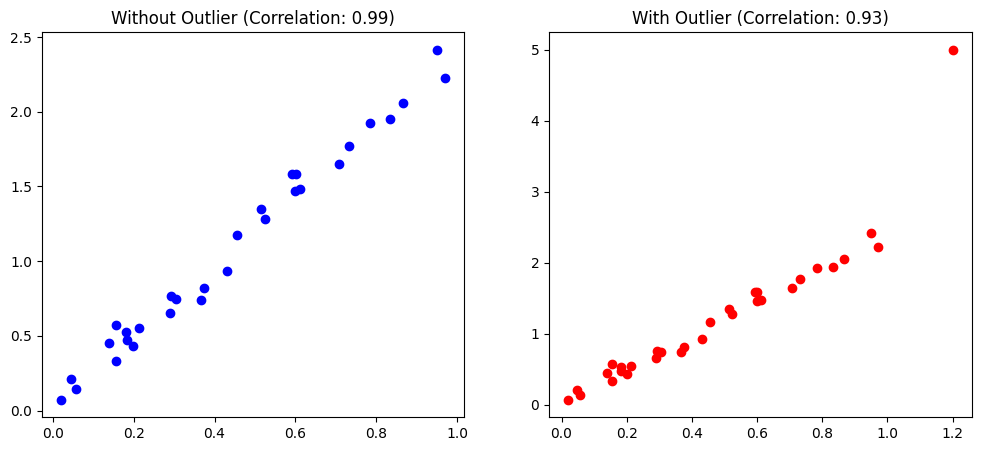

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create some sample data
np.random.seed(42)
x = np.random.rand(30)
y = 2.5 * x + np.random.randn(30) * 0.1

# Compute correlation without outlier
corr_without_outlier = np.corrcoef(x, y)[0, 1]

# Add an outlier
x_with_outlier = np.append(x, [1.2])
y_with_outlier = np.append(y, [5])

# Compute correlation with outlier
corr_with_outlier = np.corrcoef(x_with_outlier, y_with_outlier)[0, 1]

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue')
plt.title(f"Without Outlier (Correlation: {corr_without_outlier:.2f})")

plt.subplot(1, 2, 2)
plt.scatter(x_with_outlier, y_with_outlier, color='red')
plt.title(f"With Outlier (Correlation: {corr_with_outlier:.2f})")

plt.show()


Here's a simple example using the **Interquartile Range (IQR)** method:

In [ ]:
import numpy as np

# Sample data with a potential outlier
data = [10, 12, 12, 13, 12, 11, 11, 14, 13, 15, 10, 10, 10, 1000]

def detect_and_remove_outliers(data):
    # Calculate Q1, Q3 and IQR
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers
    filtered_data = [x for x in data if lower_bound <= x <= upper_bound]

    return filtered_data

filtered_data = detect_and_remove_outliers(data)
print(f"Original Data: {data}")
print(f"Data after Outlier Removal: {filtered_data}")


Original Data: [10, 12, 12, 13, 12, 11, 11, 14, 13, 15, 10, 10, 10, 1000]
Data after Outlier Removal: [10, 12, 12, 13, 12, 11, 11, 14, 13, 15, 10, 10, 10]


Robust covariance estimation aims to estimate the covariance matrix of a dataset in a way that is not unduly affected by outliers. One common method for robust covariance estimation is the **Minimum Covariance Determinant (MCD)** method.

Scikit-learn provides a convenient implementation for MCD via the EllipticEnvelope class.

Let's demonstrate this with a simple example:

In [ ]:
import numpy as np
from sklearn.covariance import EllipticEnvelope

# Generating synthetic data
np.random.seed(42)
X = np.random.randn(100, 2)
# Introducing some outliers
X_with_outliers = np.vstack([X, [[5, 5], [6, 6], [-5, -5], [-6, -6]]])

# Estimating the robust covariance using Minimum Covariance Determinant (MCD)
envelope = EllipticEnvelope(contamination=0.1)  # 10% of the data are outliers
envelope.fit(X_with_outliers)

# Robust covariance matrix
robust_covariance_matrix = envelope.covariance_

print("Robust Covariance Matrix (using MCD):")
print(robust_covariance_matrix)

# Compare this with the classical covariance estimation using numpy
classical_covariance_matrix = np.cov(X_with_outliers, rowvar=False)

print("\nClassical Covariance Matrix:")
print(classical_covariance_matrix)


Robust Covariance Matrix (using MCD):
[[0.73304552 0.03173237]
 [0.03173237 0.92409955]]

Classical Covariance Matrix:
[[1.88976044 1.21089177]
 [1.21089177 2.14348131]]


We first generate synthetic data X with random Gaussian values.
We introduce some outliers to the data.
We then estimate the robust covariance of the dataset using the MCD method from Scikit-learn's EllipticEnvelope.
Finally, we also compute the classical covariance matrix for comparison.

Computing the Minimum Covariance Determinant (MCD) from scratch is more involved than the classical covariance estimation. Still, I'll provide a simplified method for robust covariance estimation using the Median Absolute Deviation (MAD) for a 2-dimensional dataset. This won't be equivalent to MCD but will offer robustness against outliers. Here's how it works:

- Compute the median of each feature.
- Compute the MAD for each feature.
- Use the MAD values as a robust estimation of scale (like variance).

In [ ]:
import numpy as np

def mad_based_covariance(X):
    # Compute the medians
    median_x = np.median(X[:, 0])
    median_y = np.median(X[:, 1])

    # Compute the MAD for each feature
    mad_x = np.median(np.abs(X[:, 0] - median_x))
    mad_y = np.median(np.abs(X[:, 1] - median_y))

    # This will be our robust "variance" equivalent
    variance_x = mad_x**2
    variance_y = mad_y**2

    # Compute the "covariance" between x and y
    robust_cov_xy = np.median((X[:, 0] - median_x) * (X[:, 1] - median_y))

    # Construct the robust covariance matrix
    robust_cov_matrix = np.array([[variance_x, robust_cov_xy],
                                  [robust_cov_xy, variance_y]])

    return robust_cov_matrix

# Generating synthetic data
np.random.seed(42)
X = np.random.randn(100, 2)

# Introducing some outliers
X_with_outliers = np.vstack([X, [[5, 5], [6, 6], [-5, -5], [-6, -6]]])

# Estimate robust covariance
robust_cov = mad_based_covariance(X_with_outliers)

# Classical covariance for comparison
classical_cov = np.cov(X_with_outliers, rowvar=False)

print("Robust Covariance Matrix (using MAD):")
print(robust_cov)

print("\nClassical Covariance Matrix:")
print(classical_cov)


Robust Covariance Matrix (using MAD):
[[0.35317092 0.00508542]
 [0.00508542 0.45181211]]

Classical Covariance Matrix:
[[1.88976044 1.21089177]
 [1.21089177 2.14348131]]


##SVM

I'll provide a basic implementation using a sub-gradient method known as the Pegasos algorithm for linear SVMs. The Pegasos algorithm can handle both hard and soft margins through the regularization parameter.

[-1.  1.]


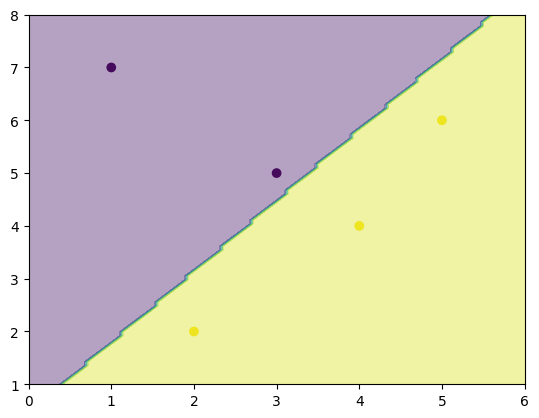

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000, hard_margin=False):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        if hard_margin:
            self.lambda_param = 1e15  # Set a large lambda for hard margin
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Convert class labels to 1 and -1
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)

    def visualize(self, X, y):
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)

        # Plot data points
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

        # Create a grid to plot decision boundaries
        x1 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
        x2 = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
        X1, X2 = np.meshgrid(x1, x2)

        # Predict class for each point in the grid
        Z = self.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

        # Plot decision boundary
        ax.contourf(X1, X2, Z, alpha=0.4)
        plt.xlim(X1.min(), X1.max())
        plt.ylim(X2.min(), X2.max())
        plt.show()

# Testing the SVM
X = np.array([
    [2, 2],
    [4, 4],
    [1, 7],
    [3, 5],
    [5, 6],
])

y = np.array([1, 1, -1, -1, 1])

svm = SVM()
svm.fit(X, y)
print(svm.predict([[0, 3], [5, 5]]))
svm.visualize(X, y)

Handling non-linear data without a library is more involved, especially because the SVM for non-linear data requires solving a quadratic programming problem. The key to handling non-linear data with SVMs is to use the kernel trick. A kernel function allows us to operate in the original feature space without computing the coordinates of the data in a higher-dimensional space.

I'll outline a simple SVM with a Radial Basis Function (RBF) kernel. Here, we'll implement the Sequential Minimal Optimization (SMO) algorithm, a popular method for training SVMs. Given the complexity of the full SMO, this will be a simplified version to provide a conceptual understanding:

* Kernel Function: Implement the RBF kernel.
* SMO Algorithm: Use a simplified SMO approach for optimization.
* Visualization: Visualize the decision boundary.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rbf_kernel(x1, x2, gamma=1.0):
    return np.exp(-gamma * np.linalg.norm(x1 - x2) ** 2)

class KernelSVM:
    def __init__(self, C=1.0, gamma=1.0, max_iters=1000, tol=1e-5):
        self.C = C
        self.gamma = gamma
        self.max_iters = max_iters
        self.tol = tol
        self.alpha = None
        self.sv = None
        self.sv_y = None
        self.b = 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.alpha = np.zeros(n_samples)
        self.b = 0

        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = rbf_kernel(X[i], X[j], self.gamma)

        for _ in range(self.max_iters):
            alpha_prev = np.copy(self.alpha)

            for j in range(n_samples):
                i = self._get_random_int(0, n_samples-1, j)  # Get random i
                eta = 2.0 * K[i, j] - K[i, i] - K[j, j]

                if eta >= 0:
                    continue

                L, H = self._get_bounds(i, j, y)

                # Compute model prediction for i and j
                y_i_pred = self._predict_row(K[:, i])
                y_j_pred = self._predict_row(K[:, j])
                e_i = y_i_pred - y[i]
                e_j = y_j_pred - y[j]

                # Update alpha values
                self.alpha[j] -= y[j] * (e_i - e_j) / eta
                self.alpha[j] = np.clip(self.alpha[j], L, H)

                self.alpha[i] += y[i] * y[j] * (self.alpha[j] - alpha_prev[j])

                # Update bias
                b1 = self.b - e_i - y[i]*(self.alpha[i]-alpha_prev[i])*K[i, i] - y[j]*(self.alpha[j]-alpha_prev[j])*K[i, j]
                b2 = self.b - e_j - y[i]*(self.alpha[i]-alpha_prev[i])*K[i, j] - y[j]*(self.alpha[j]-alpha_prev[j])*K[j, j]
                if 0 < self.alpha[i] < self.C:
                    self.b = b1
                elif 0 < self.alpha[j] < self.C:
                    self.b = b2
                else:
                    self.b = (b1 + b2) / 2.0

            # Convergence check
            diff = np.linalg.norm(self.alpha - alpha_prev)
            if diff < self.tol:
                break

        # Extract support vectors
        # self.sv = X[self.alpha > 0]
        # self.sv_y = y[self.alpha > 0]
        # self.alpha = self.alpha[self.alpha > 0]
        sv_indices = self.alpha > 0
        self.sv = X[sv_indices]
        self.sv_y = y[sv_indices]
        self.alpha = self.alpha[sv_indices]

    def _get_random_int(self, a, b, z):
        i = z
        while i == z:
            i = np.random.randint(a, b)
        return i

    def _get_bounds(self, i, j, y):
        if y[i] != y[j]:
            return (max(0, self.alpha[j] - self.alpha[i]), min(self.C, self.C + self.alpha[j] - self.alpha[i]))
        else:
            return (max(0, self.alpha[i] + self.alpha[j] - self.C), min(self.C, self.alpha[i] + self.alpha[j]))

    def _predict_row(self, K_row):
        return np.dot(K_row, self.alpha * self.sv_y) + self.b

    def predict(self, X):
        y_pred = []
        for sample in X:
            prediction = 0
            for a, sv_y, sv in zip(self.alpha, self.sv_y, self.sv):
                prediction += a * sv_y * rbf_kernel(sample, sv, self.gamma)
            prediction += self.b
            y_pred.append(np.sign(prediction))
        return np.array(y_pred)

    def visualize(self, X, y):
        fig, ax = plt.subplots()

        # Plot data points
        ax.scatter(X[:, 0], X[:, 1], c=y)

        # Create a grid to plot decision boundaries
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        XX, YY = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

        # Predict class for each point in the grid
        Z = self.predict(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)

        # Plot decision boundary
        ax.contourf(XX, YY, Z, alpha=0.8)
        plt.show()

# Testing the KernelSVM
X = np.array([
    [2, 2],
    [4, 4],
    [1, 7],
    [3, 5],
    [5, 6],
    [1, 3],
    [4, 2],
])

y = np.array([1, 1, -1, -1, 1, -1, 1])

svm = KernelSVM(C=100)
svm.fit(X, y)
svm.visualize(X, y)


TypeError: ignored

##Decision Tree

Decision trees are popular machine learning algorithms used for both classification and regression tasks. There are several algorithms used to construct decision trees, and each of them relies on different methodologies to split the data at each node. Here are some of the key decision tree algorithms:

1. **ID3 (Iterative Dichotomiser 3)**:
   - Developed by Ross Quinlan in 1986.
   - Used for classification tasks.
   - Utilizes the **Entropy** and **Information Gain** as metrics to decide the best split.
   - Can handle only categorical attributes.

2. **C4.5 (Successor of ID3)**:
   - Also developed by Ross Quinlan.
   - Can handle both categorical and continuous attributes.
   - Uses the **Gain Ratio** (a modification of Information Gain) to decide the best split.
   - Produces smaller and more balanced trees compared to ID3.

3. **CART (Classification And Regression Trees)**:
   - Developed by Breiman et al.
   - Can be used for both classification (uses **Gini Impurity** as a metric) and regression (uses variance or mean squared error as metrics).
   - Produces binary trees, i.e., each internal node has exactly two children.

4. **CHAID (Chi-squared Automatic Interaction Detector)**:
   - Uses the chi-squared test to decide the best split.
   - Can produce more than two children for a node.
   - Mainly used for categorical inputs.

Now, let's dive deeper into **ID3**, **Entropy**, and **Information Gain**:

#### ID3 Algorithm:
The ID3 algorithm is a greedy algorithm that constructs a decision tree top-down, choosing a variable at each step that best splits the set of items. The specific criterion that ID3 uses is the **Information Gain**.

#### Entropy:
Entropy is a measure of randomness or unpredictability in the dataset. For a binary classification (with labels being 0 and 1):

Entropy(S) = $-p_+ log_2(p_+) - p_- log_2(p_-)$

Where:
- \( S \) is the dataset.
- $( p_+)$ is the proportion of positive examples in \( S \).
- $( p_-)$ is the proportion of negative examples in \( S \).

Entropy is 0 when a set contains examples from only one class and is maximum when the set contains an equal number of positive and negative examples.

### Information Gain:
Information Gain measures the reduction in entropy achieved because of a split. The goal is to maximize the information gain at each split:

$ \text{Information Gain}(S, A) = \text{Entropy}(S) - \sum_{v \in \text{Values}(A)} \left( \frac{|S_v|}{|S|} \times \text{Entropy}(S_v) \right)$

Where:
- \( S \) is the dataset before the split.
- \( A \) is an attribute or feature.
- $( \text{Values}(A) $) are the different values \( A \) can take.
- $( S_v $) is the subset of \( S \) for which attribute \( A \) has value \( v \).

In the ID3 algorithm, for each attribute, the Information Gain is computed, and the attribute with the highest Information Gain is chosen to make the split. This process is recursively applied to each child node until one of the stopping conditions is met, such as the node contains examples from only one class, or all the attributes are already used up, etc.

In [ ]:
data = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Female'],
    'Education Level': ['High School', 'Graduate', 'Postgraduate', 'Graduate', 'High School'],
    'Car Ownership': [0, 1, 1, 0, 0],
    'Age': [20, 25, 30, 22, 19]
}


In [ ]:
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy = -np.sum([(counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

def InfoGain(data, split_attribute_name, target_name="Age"):
    total_entropy = entropy(data[target_name])

    vals, counts = np.unique(data[split_attribute_name], return_counts=True)
    # Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    weighted_entropy = sum([(counts[i] / np.sum(counts)) * entropy([data[target_name][j] for j in range(len(data[target_name])) if data[split_attribute_name][j] == vals[i]]) for i in range(len(vals))])
    Information_Gain = total_entropy - weighted_entropy
    return Information_Gain

def ID3(data, originaldata, features, target_attribute_name="Age", parent_node_class=None):
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]

    elif len(data) == 0:
        return np.unique(originaldata[target_attribute_name])[0]

    elif len(features) == 0:
        return parent_node_class

    else:
        parent_node_class = np.unique(data[target_attribute_name])[0]
        item_values = [InfoGain(data, feature, target_attribute_name) for feature in features]
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]

        tree = {best_feature: {}}

        features = [i for i in features if i != best_feature]

        for value in np.unique(data[best_feature]):
            # value = value
            # sub_data = data.where(data[best_feature] == value).dropna()
            # subtree = ID3(sub_data, originaldata, features, target_attribute_name, parent_node_class)
            # tree[best_feature][value] = subtree

            # Filtering the data where the best feature has a specific value
            sub_data_indices = [index for index, feature_val in enumerate(data[best_feature]) if feature_val == value]
            sub_data = {key: [data[key][i] for i in sub_data_indices] for key in data.keys()}

            subtree = ID3(sub_data, originaldata, features, target_attribute_name, parent_node_class)
            tree[best_feature][value] = subtree

        return tree

# Since we're not using pandas or any other libraries, we'll implement this using numpy for some functions.
import numpy as np

# Create the decision tree
tree = ID3(data, data, list(data.keys())[:-1])
print(tree)


{'Education Level': {'Graduate': {'Car Ownership': {0: 22, 1: 25}}, 'High School': {'Gender': {'Female': 19, 'Male': 20}}, 'Postgraduate': 30}}


Let's break this down:

1. The root of the decision tree is based on the "Education Level" feature.
2. For individuals with an "Education Level" of "Graduate":
   - The next deciding feature is "Car Ownership".
     - If "Car Ownership" is 0, the predicted age is 22.
     - If "Car Ownership" is 1, the predicted age is 25.
3. For individuals with an "Education Level" of "High School":
   - The next deciding feature is "Gender".
     - If the "Gender" is "Female", the predicted age is 19.
     - If the "Gender" is "Male", the predicted age is 20.
4. For individuals with an "Education Level" of "Postgraduate":
   - There's no further split, and the predicted age is directly 30.

You can interpret this tree as a series of if-else decisions to determine the predicted age:

```
If Education Level is Graduate:
    if Car Ownership is 0:
        Predicted age = 22
    else:
        Predicted age = 25
Else if Education Level is High School:
    if Gender is Female:
        Predicted age = 19
    else:
        Predicted age = 20
Else:
    Predicted age = 30  # For Postgraduate
```

This tree allows you to determine the predicted age based on the given features.

##Dropout

 Dropout is a regularization technique that is often used in neural networks. During training, dropout involves randomly setting a fraction of input units to 0 at each update, which helps to prevent overfitting.

In [ ]:
import numpy as np

def dropout(X, dropout_rate=0.5, training=True):
    """
    Applies dropout to the input tensor.

    Parameters:
        X (numpy.ndarray): Input tensor.
        dropout_rate (float): The probability of dropping an element.
        training (bool): If True, applies dropout, else returns the original tensor.

    Returns:
        numpy.ndarray: Tensor after applying dropout.
    """
    if not training:
        return X

    # Create a binary mask (0s or 1s) using the dropout rate.
    # If an element is set to 0, it's "dropped out".
    mask = np.random.binomial(1, 1 - dropout_rate, X.shape)

    # Element-wise multiplication of the input tensor with the mask.
    return X * mask

# Test the dropout function
X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

print("Original Matrix:")
print(X)

print("\nMatrix After Dropout:")
print(dropout(X, dropout_rate=0.4))


Original Matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Matrix After Dropout:
[[1 2 3]
 [4 0 0]
 [0 8 9]]


##Non-Linear Dimensionality Reduction

First, let's generate some synthetic data:

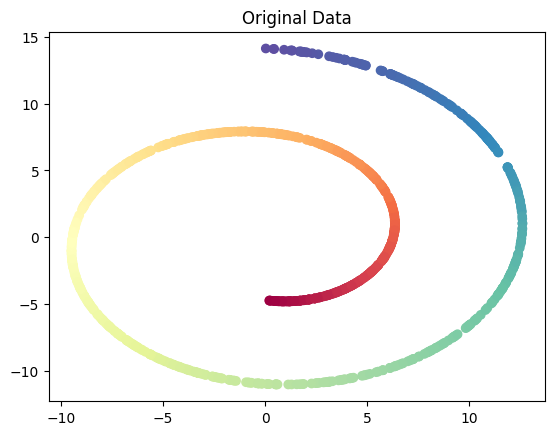

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll

# Generate Swiss roll data
X, color = make_swiss_roll(n_samples=1000, random_state=42)

# Visualize the synthetic data
plt.scatter(X[:, 0], X[:, 2], c=color, cmap=plt.cm.Spectral)
plt.title("Original Data")
plt.show()


Now, let's apply the dimensionality reduction techniques:

###t-SNE(Distributed Stochastic Neighbor Embedding)

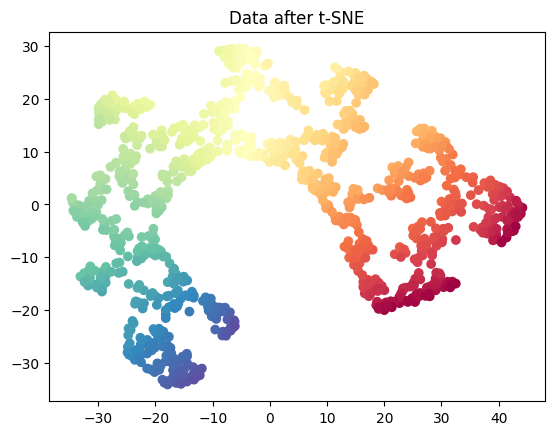

In [ ]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Data after t-SNE")
plt.show()


###UMAP

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=a889423895dd208be221479fe055f7e9ae1b6b947d56d89c27f5589968a6f2b1
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=c1462de80d5e1ed3b0db8189087e006eb65516c3f4794a99deb8247b7d38e49e
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


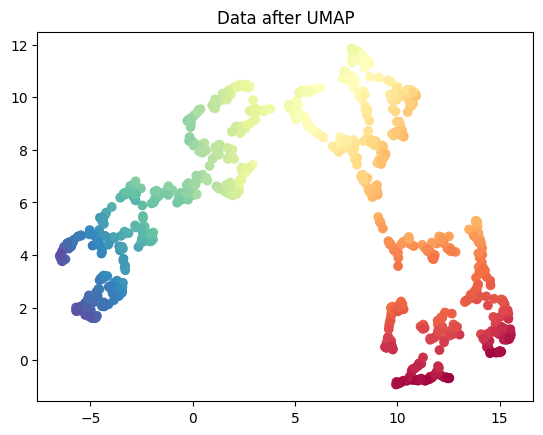

In [ ]:
import umap

reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X)

plt.scatter(X_umap[:, 0], X_umap[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Data after UMAP")
plt.show()


### LLE (Locally Linear Embedding)

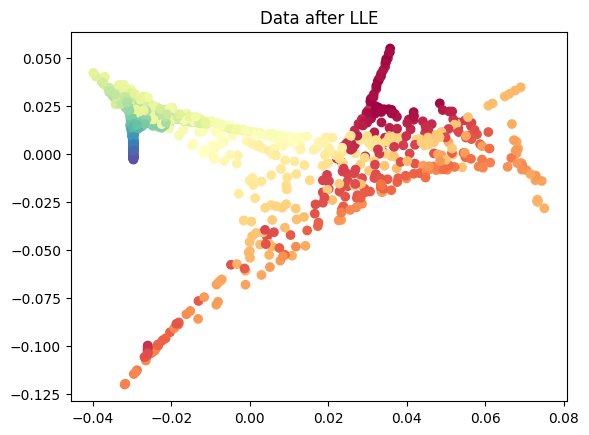

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, random_state=42)
X_lle = lle.fit_transform(X)

plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Data after LLE")
plt.show()


The visualization helps to understand how each technique changes the representation of the data. The Swiss roll dataset is used as it presents a clear non-linear structure that's challenging for linear dimensionality reduction techniques.

Given the non-linear structure of the Swiss roll dataset, linear dimensionality reduction techniques like PCA and LDA will struggle to capture the underlying structure.

Let's explore what happens when we apply PCA and LDA to the Swiss roll data:

###PCA

PCA will attempt to maximize variance along orthogonal axes. However, it won't be able to "unroll" the Swiss roll.

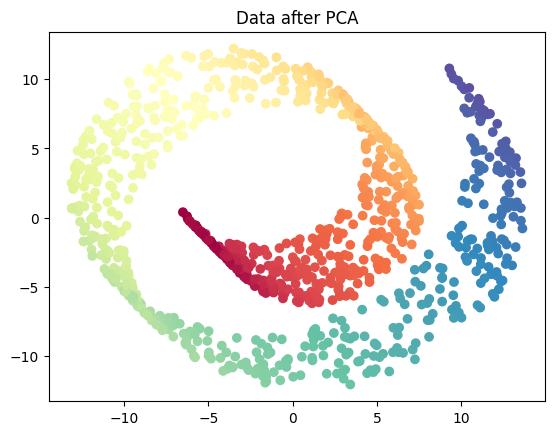

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Data after PCA")
plt.show()


###LDA

LDA tries to maximize the separability between classes. Since the Swiss roll dataset isn't inherently a classification dataset, we'd have to use the color (or depth along the roll) as a "class label" to apply LDA. This isn't a typical use of LDA, and the results might not be meaningful, but for the sake of demonstration:

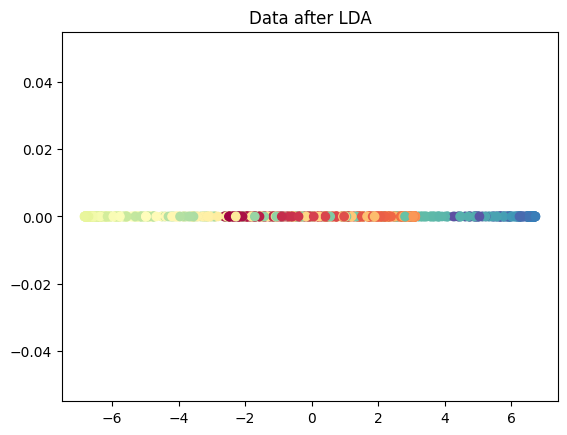

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Convert continuous color to discrete labels for LDA
labels = np.digitize(color, np.histogram_bin_edges(color, bins=10))

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, labels)

# Since LDA gives us just 1 component (because we have 2 classes),
# we'll scatter plot against zeros to visualize it.
plt.scatter(X_lda[:, 0], [0]*len(X_lda), c=color, cmap=plt.cm.Spectral)
plt.title("Data after LDA")
plt.show()


##LDA

Linear Discriminant Analysis (LDA) is a supervised dimensionality reduction technique used primarily for classification tasks. It aims to find the linear combinations of features that best separate two or more classes in a dataset. Unlike PCA, which disregards class labels and finds the axis that maximizes variance, LDA uses class labels to maximize the separability between different classes.

**Mathematics of LDA**:

1. **Compute the Within-Class Scatter Matrix (S_W) and Between-Class Scatter Matrix (S_B)**:

  For $( c $) classes, let $( m_i $) be the mean vector of class $( i $) and $( m $) be the overall mean.

  The within-class scatter matrix $( S_W $) is the sum of scatter matrices for each individual class:
  $ S_W = \sum_{i=1}^c S_i $
  where $ S_i $) is the scatter matrix for class $( i $):
  $ S_i = \sum_{x \in D_i} (x - m_i) (x - m_i)^T $
  Here, $( D_i $) represents the samples of class $( i $).

  The between-class scatter matrix $( S_B $) is defined as:
  $ S_B = \sum_{i=1}^c N_i (m_i - m) (m_i - m)^T $
  where $( N_i $) is the number of samples in class $( i $).

2. **Find the Eigenvalues and Eigenvectors for the Generalized Eigenvalue Problem**:

  Solve the generalized eigenvalue problem for the matrix $( S_W^{-1} S_B $). This involves finding eigenvalues ( $\lambda$ ) and corresponding eigenvectors $( v $) that satisfy:
  $ S_W^{-1} S_B v = \lambda v $

3. **Sort Eigenvalues and their Corresponding Eigenvectors**:

  Sort the eigenvalues in descending order and choose the top \( k \) eigenvectors, where \( k \) is the number of classes minus one (i.e., \( k = c - 1 \)).

4. **Form the New Feature Space**:

  The top \( k \) eigenvectors (in columns) form the transformation matrix \( W \). To project a sample \( x \) onto the new feature space, compute $( y = W^T x $).

**Class Labels Consideration**:

LDA uses class labels in its calculations to maximize the separability between classes. The between-class scatter matrix $( S_B $) encapsulates the variance between different class means, while the within-class scatter matrix $( S_W $) captures the variance within each class. LDA seeks to maximize the ratio of the determinant of $( S_B $) to the determinant of $( S_W $), which essentially aims to maximize the distance between means of different classes while minimizing the spread (variance) of each class.

In contrast, PCA does not take class labels into consideration and focuses solely on maximizing variance, which might not always be ideal for classification tasks since high variance does not necessarily mean good class separability.

In essence, while PCA aims to represent data with maximum variance in lower dimensions, LDA aims to represent data in a way that best separates different classes.


Writing a Linear Discriminant Analysis (LDA) from scratch involves several steps, such as computing the mean vectors for each class, the within-class scatter matrix, the between-class scatter matrix, and then finding the eigenvalues and eigenvectors for the generalized eigenvalue problem derived from these matrices. Finally, sorting and choosing the top k eigenvectors will give the new reduced space.

Here's an outline of the steps we'll follow:

Create a synthetic dataset.
Write the LDA algorithm from scratch.
Visualize using LDA.
Perform PCA on the same data and visualize.
Compare the visualizations.

Creating a Synthetic Dataset:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
class1 = np.random.randn(100, 2)
class2 = np.random.randn(100, 2) + [4, 4]
data = np.vstack([class1, class2])
labels = np.array([0]*100 + [1]*100)


In [ ]:
# Compute the mean vector for each class
mean1 = np.mean(class1, axis=0)
mean2 = np.mean(class2, axis=0)

# Compute the within-class scatter matrix
sw = np.dot((class1 - mean1).T, (class1 - mean1)) + np.dot((class2 - mean2).T, (class2 - mean2))

# Compute the between-class scatter matrix
sb = np.outer((mean1 - mean2), (mean1 - mean2).T)

# Compute the generalized eigenvalue problem
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(sw).dot(sb))

# Sort the eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigvals)[::-1]
w = eigvecs[:, sorted_indices[0]]

# Project data
lda_data = data.dot(w)


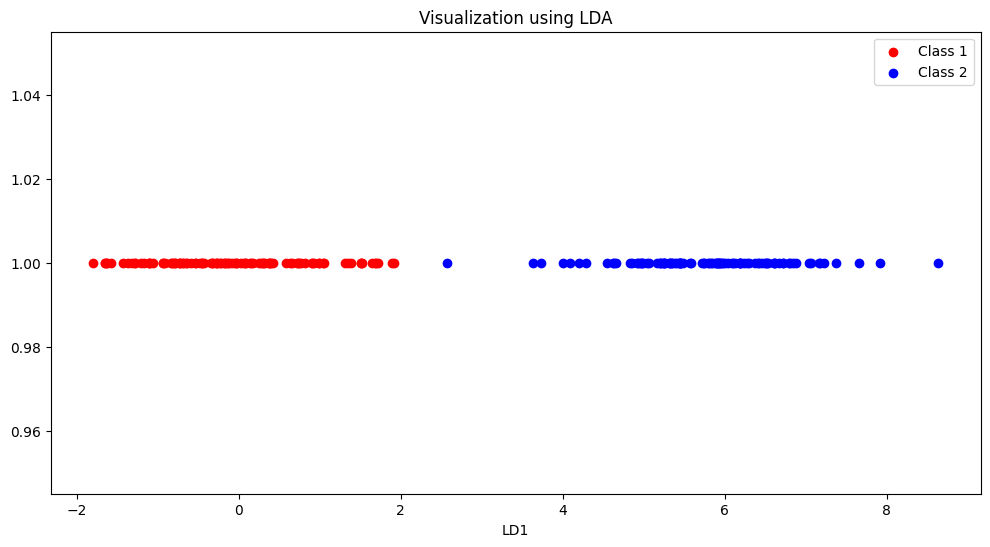

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(lda_data[:100], [1]*100, color='red', label='Class 1')
plt.scatter(lda_data[100:], [1]*100, color='blue', label='Class 2')
plt.title("Visualization using LDA")
plt.xlabel("LD1")
plt.legend()
plt.show()


PCA on the same data:

In [ ]:
# Center the data
data_centered = data - np.mean(data, axis=0)

# Compute covariance matrix
cov_matrix = np.cov(data_centered, rowvar=False)

# Eigendecomposition
eigvals_pca, eigvecs_pca = np.linalg.eigh(cov_matrix)

# Sort eigenvectors by eigenvalues in descending order
sorted_indices_pca = np.argsort(eigvals_pca)[::-1]
top_eigvec = eigvecs_pca[:, sorted_indices_pca[:2]]

# Project data
pca_data = data_centered.dot(top_eigvec)


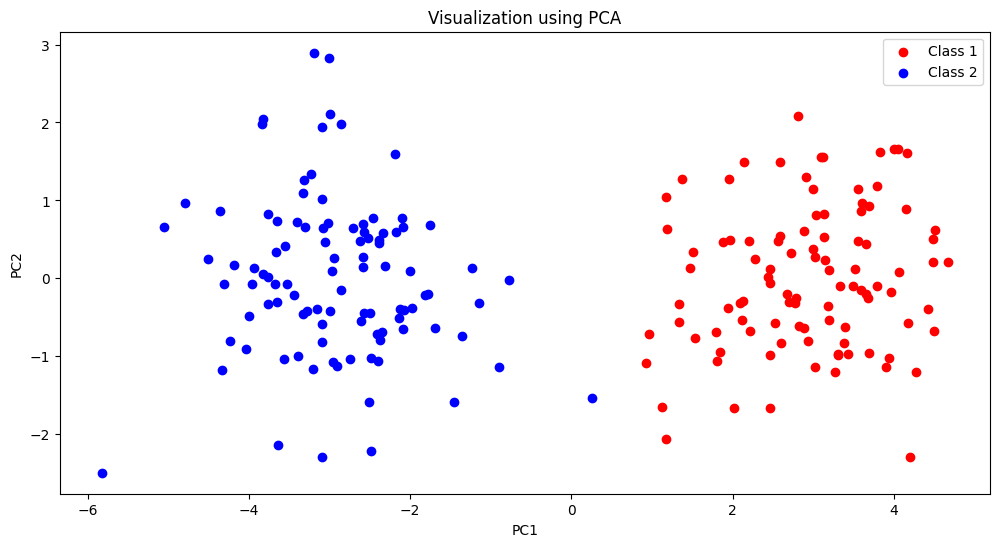

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(pca_data[:100, 0], pca_data[:100, 1], color='red', label='Class 1')
plt.scatter(pca_data[100:, 0], pca_data[100:, 1], color='blue', label='Class 2')
plt.title("Visualization using PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


LDA tries to maximize the separation between the two classes, while PCA tries to capture the most variance in the data.

##Regularization

This code will provide you with visualizations to understand how the loss evolves over epochs for both L1 and L2 regularization, and how the coefficient value of a changes with different regularization strengths. You can extend the logic to visualize the paths for coefficients b and c as well.

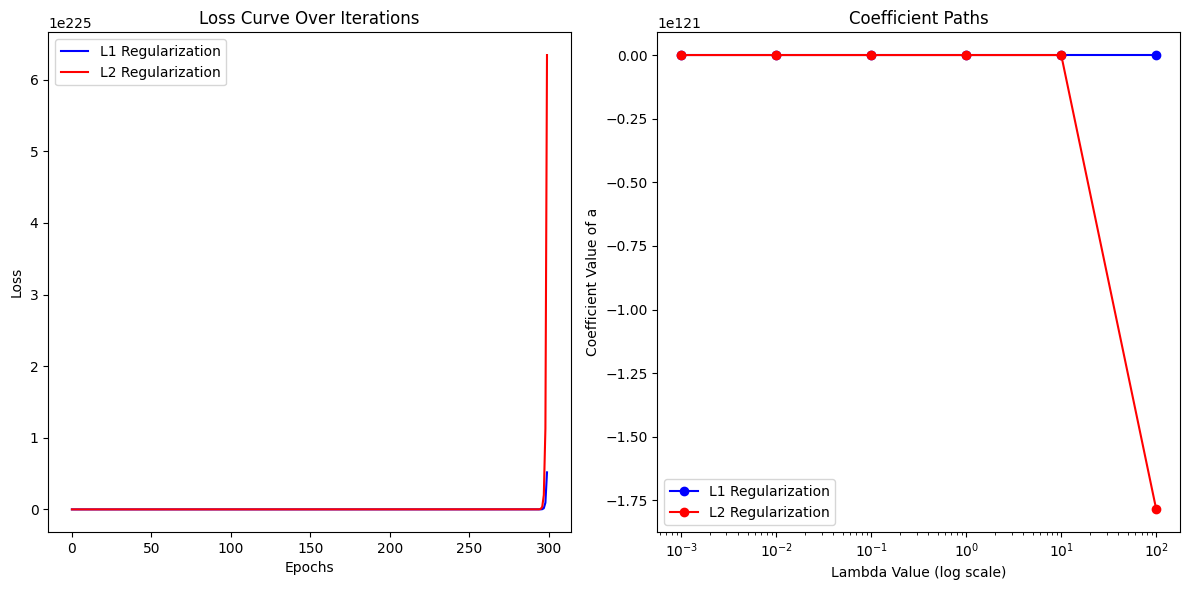

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 4, 5, 4, 5]
z = [5, 3, 3, 2, 1]
label = [8, 14, 15, 14, 13]

a, b, c = 1.0, 1.0, 1.0
learning_rate = 0.01
lambda_val = 0.1
epochs = 300

losses_L1 = []
losses_L2 = []

# L1 Regularization (Lasso)
for _ in range(epochs):
    loss = 0
    da = db = dc = 0
    for i in range(len(x)):
        prediction = a*x[i] + b*y[i] + c*z[i]
        loss += (prediction - label[i])**2
        da += 2 * x[i] * (prediction - label[i]) + lambda_val * (1 if a > 0 else -1)
        db += 2 * y[i] * (prediction - label[i]) + lambda_val * (1 if b > 0 else -1)
        dc += 2 * z[i] * (prediction - label[i]) + lambda_val * (1 if c > 0 else -1)

    losses_L1.append(loss)

    a -= learning_rate * da
    b -= learning_rate * db
    c -= learning_rate * dc

# L2 Regularization (Ridge)
a, b, c = 1.0, 1.0, 1.0
for _ in range(epochs):
    loss = 0
    da = db = dc = 0
    for i in range(len(x)):
        prediction = a*x[i] + b*y[i] + c*z[i]
        loss += (prediction - label[i])**2
        da += 2 * x[i] * (prediction - label[i]) + 2 * lambda_val * a
        db += 2 * y[i] * (prediction - label[i]) + 2 * lambda_val * b
        dc += 2 * z[i] * (prediction - label[i]) + 2 * lambda_val * c

    losses_L2.append(loss)

    a -= learning_rate * da
    b -= learning_rate * db
    c -= learning_rate * dc

# Visualization
plt.figure(figsize=(12, 6))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(losses_L1, label='L1 Regularization', color='blue')
plt.plot(losses_L2, label='L2 Regularization', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve Over Iterations')

# Coefficient values (For simplicity, only plotting 'a' coefficient, similar plots can be made for 'b' and 'c')
plt.subplot(1, 2, 2)
lambdas = [0.001, 0.01, 0.1, 1, 10, 100]
coeffs_L1 = []
coeffs_L2 = []

for lam in lambdas:
    # (For brevity, I'm only calculating the 'a' coefficient after 10 epochs for each lambda value)
    # You can extend this logic to capture the evolution of 'a' (or 'b' and 'c') with more epochs.
    a = 1.0
    for _ in range(10):
        da = 0
        for i in range(len(x)):
            prediction = a*x[i] + b*y[i] + c*z[i]
            da += 2 * x[i] * (prediction - label[i]) + lam * (1 if a > 0 else -1)
        a -= learning_rate * da
    coeffs_L1.append(a)

    a = 1.0
    for _ in range(10):
        da = 0
        for i in range(len(x)):
            prediction = a*x[i] + b*y[i] + c*z[i]
            da += 2 * x[i] * (prediction - label[i]) + 2 * lam * a
        a -= learning_rate * da
    coeffs_L2.append(a)

plt.plot(lambdas, coeffs_L1, marker='o', label='L1 Regularization', color='blue')
plt.plot(lambdas, coeffs_L2, marker='o', label='L2 Regularization', color='red')
plt.xscale('log')
plt.ylabel('Coefficient Value of a')
plt.legend()
plt.title('Coefficient Paths')

plt.tight_layout()
plt.show()


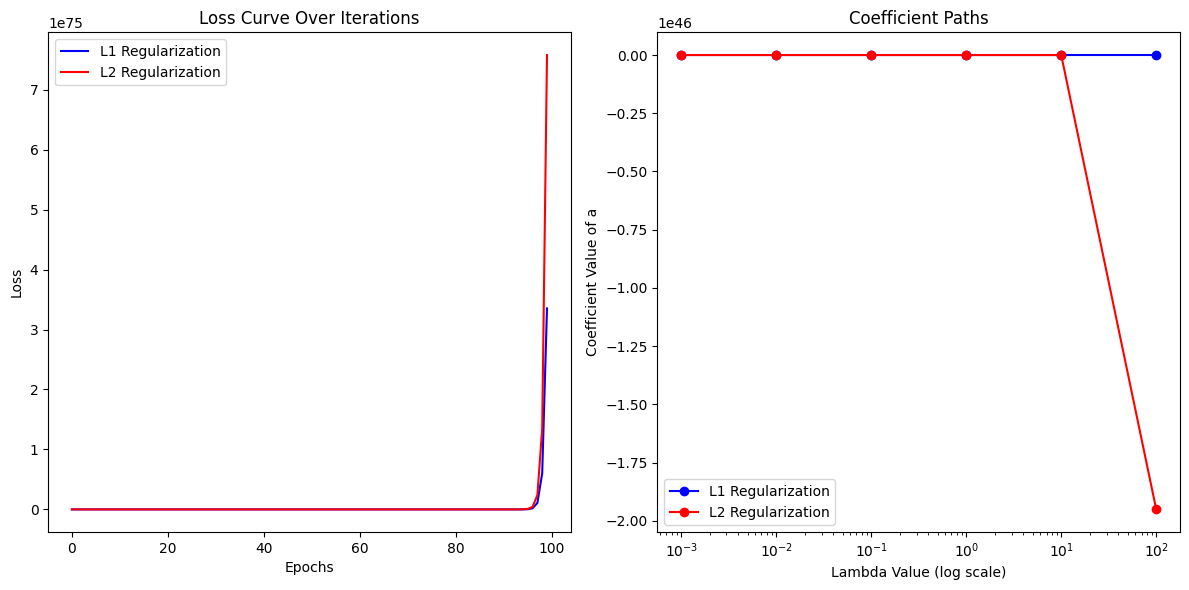

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 4, 5, 4, 5]
z = [5, 3, 3, 2, 1]
label = [8, 14, 15, 14, 13]

a, b, c = 1.0, 1.0, 1.0
learning_rate = 0.01
lambda_val = 0.1
epochs = 100

losses_L1 = []
losses_L2 = []

# L1 Regularization (Lasso)
for _ in range(epochs):
    loss = 0
    da = db = dc = 0
    for i in range(len(x)):
        prediction = a*x[i] + b*y[i] + c*z[i]
        loss += (prediction - label[i])**2
        da += 2 * x[i] * (prediction - label[i]) + lambda_val * (1 if a > 0 else -1)
        db += 2 * y[i] * (prediction - label[i]) + lambda_val * (1 if b > 0 else -1)
        dc += 2 * z[i] * (prediction - label[i]) + lambda_val * (1 if c > 0 else -1)

    losses_L1.append(loss)

    a -= learning_rate * da
    b -= learning_rate * db
    c -= learning_rate * dc

# L2 Regularization (Ridge)
a, b, c = 1.0, 1.0, 1.0
for _ in range(epochs):
    loss = 0
    da = db = dc = 0
    for i in range(len(x)):
        prediction = a*x[i] + b*y[i] + c*z[i]
        loss += (prediction - label[i])**2
        da += 2 * x[i] * (prediction - label[i]) + 2 * lambda_val * a
        db += 2 * y[i] * (prediction - label[i]) + 2 * lambda_val * b
        dc += 2 * z[i] * (prediction - label[i]) + 2 * lambda_val * c

    losses_L2.append(loss)

    a -= learning_rate * da
    b -= learning_rate * db
    c -= learning_rate * dc

# Visualization
plt.figure(figsize=(12, 6))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(losses_L1, label='L1 Regularization', color='blue')
plt.plot(losses_L2, label='L2 Regularization', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve Over Iterations')

# Coefficient values (For simplicity, only plotting 'a' coefficient, similar plots can be made for 'b' and 'c')
plt.subplot(1, 2, 2)
lambdas = [0.001, 0.01, 0.1, 1, 10, 100]
coeffs_L1 = []
coeffs_L2 = []

for lam in lambdas:
    # (For brevity, I'm only calculating the 'a' coefficient after 10 epochs for each lambda value)
    # You can extend this logic to capture the evolution of 'a' (or 'b' and 'c') with more epochs.
    a = 1.0
    for _ in range(10):
        da = 0
        for i in range(len(x)):
            prediction = a*x[i] + b*y[i] + c*z[i]
            da += 2 * x[i] * (prediction - label[i]) + lam * (1 if a > 0 else -1)
        a -= learning_rate * da
    coeffs_L1.append(a)

    a = 1.0
    for _ in range(10):
        da = 0
        for i in range(len(x)):
            prediction = a*x[i] + b*y[i] + c*z[i]
            da += 2 * x[i] * (prediction - label[i]) + 2 * lam * a
        a -= learning_rate * da
    coeffs_L2.append(a)

plt.plot(lambdas, coeffs_L1, marker='o', label='L1 Regularization', color='blue')
plt.plot(lambdas, coeffs_L2, marker='o', label='L2 Regularization', color='red')
plt.xscale('log')
plt.xlabel('Lambda Value (log scale)')
plt.ylabel('Coefficient Value of a')
plt.legend()
plt.title('Coefficient Paths')

plt.tight_layout()
plt.show()


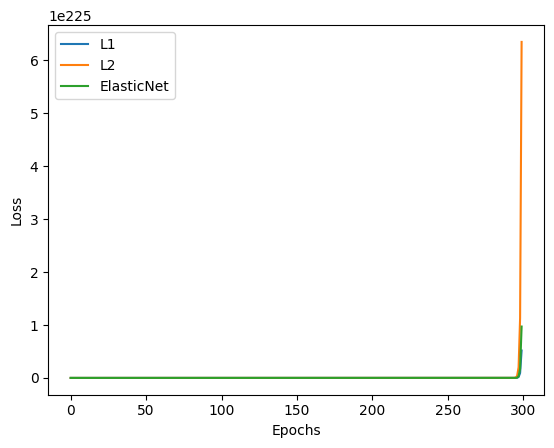

In [ ]:
def compute_loss_and_gradients(x, y, z, label, a, b, c, lambda_val, regularization="L2"):
    loss = 0
    da, db, dc = 0, 0, 0

    for i in range(len(x)):
        prediction = a*x[i] + b*y[i] + c*z[i]
        loss += (prediction - label[i])**2

        # Gradients without regularization
        da += 2 * x[i] * (prediction - label[i])
        db += 2 * y[i] * (prediction - label[i])
        dc += 2 * z[i] * (prediction - label[i])

        # Regularization
        if regularization == "L1":
            da += lambda_val * (1 if a > 0 else -1)
            db += lambda_val * (1 if b > 0 else -1)
            dc += lambda_val * (1 if c > 0 else -1)
        elif regularization == "L2":
            da += 2 * lambda_val * a
            db += 2 * lambda_val * b
            dc += 2 * lambda_val * c
        elif regularization == "ElasticNet":
            alpha = 0.5  # typically between 0 and 1, you can adjust this
            da += lambda_val * ((1 - alpha) * a + alpha * (1 if a > 0 else -1))
            db += lambda_val * ((1 - alpha) * b + alpha * (1 if b > 0 else -1))
            dc += lambda_val * ((1 - alpha) * c + alpha * (1 if c > 0 else -1))

    return loss, da, db, dc


x = [1, 2, 3, 4, 5]
y = [2, 4, 5, 4, 5]
z = [5, 3, 3, 2, 1]
label = [8, 14, 15, 14, 13]

a, b, c = 1.0, 1.0, 1.0
learning_rate = 0.01
lambda_val = 0.1
epochs = 300

regularizations = ["L1", "L2", "ElasticNet"]
losses = {reg: [] for reg in regularizations}

for regularization in regularizations:
    a, b, c = 1.0, 1.0, 1.0
    for _ in range(epochs):
        loss, da, db, dc = compute_loss_and_gradients(x, y, z, label, a, b, c, lambda_val, regularization)
        losses[regularization].append(loss)

        # Update parameters
        a -= learning_rate * da
        b -= learning_rate * db
        c -= learning_rate * dc

# Visualization of loss curves
import matplotlib.pyplot as plt
for regularization, loss in losses.items():
    plt.plot(loss, label=regularization)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Elastic Net: A combination of L1 and L2 regularization. It has two hyperparameters to adjust the strength of L1 and L2 regularization.

##KNN

In [ ]:
from collections import Counter

# train_points = [23, 45, 67, 34, 15, 89]
# labels = [1, 0, 2, 1, 1, 0]

train_points = [10, 20, 30, 40, 50, 60]
labels = [0, 1, 0, 1, 0, 1]


def knn(test_point, k=3):
  list_of_dist = []
  dict_of_labels = {}
  for idx, point in enumerate(train_points):
    diff = abs(test_point - point)
    list_of_dist.append((diff, labels[idx]))

  list_of_dist = sorted(list_of_dist, key=lambda x:x[0], reverse=False)
  print(list_of_dist)
  # for i,j in list_of_dist[:k]:
  #   if j in dict_of_labels.keys():
  #     dict_of_labels[j] += 1
  #   else:
  #     dict_of_labels[j] = 1

  k_nearest_labels = [label for _, label in list_of_dist[:k]]
  label_counts = Counter(k_nearest_labels)
  max_count = label_counts.most_common(1)[0][1]
  most_Common_labels = [label for label, count in label_counts.items() if count==max_count]

  # If there's a tie, return the label of the nearest neighbor among the tied labels
  if len(most_Common_labels) > 1:
    for _, label in list_of_dist:
      if label in most_Common_labels:
        return label

  else:
    return most_Common_labels[0]
  print(most_Common_labels)
  # return list(dict_of_labels.keys())[0]


In [ ]:
knn(35, k=4)

[(5, 0), (5, 1), (15, 1), (15, 0), (25, 0), (25, 1)]


0

In [ ]:
from collections import Counter

def knn(test_point, k=3):
    # Calculate distances and sort by distance
    list_of_dist = sorted([(abs(test_point - point), label) for point, label in combined_data], key=lambda x: x[0])

    # Extract labels of the top k closest points
    k_nearest_labels = [label for _, label in list_of_dist[:k]]

    # Use Counter to find the most common label among the k nearest neighbors
    label_counts = Counter(k_nearest_labels)

    # Handle ties
    max_count = label_counts.most_common(1)[0][1]
    most_common_labels = [label for label, count in label_counts.items() if count == max_count]

    # If there's a tie, return the label of the nearest neighbor among the tied labels
    if len(most_common_labels) > 1:
        for _, label in list_of_dist:
            if label in most_common_labels:
                return label
    else:
        return most_common_labels[0]


In [ ]:
knn(35, k=4)

[(5, 0), (5, 1), (15, 1), (15, 0), (25, 0), (25, 1)]


0

##Isolation Forest

Let's walk through how you could implement a simplified version of the Isolation Forest algorithm from scratch in Python without using any external libraries like `scikit-learn` or `PyOD`.

### Key Components of Isolation Forest

1. **Isolation Tree**: A binary tree that recursively partitions the data by randomly selecting a feature and a split value until all data points are isolated.
   
2. **Isolation Forest**: A collection of Isolation Trees (an ensemble) that work together to compute an anomaly score for each data point. The anomaly score is based on the average path length across all trees in the forest.

3. **Anomaly Score Calculation**: The shorter the average path length for a data point, the more likely it is an anomaly.


In [ ]:
import numpy as np
import random
import math

In [ ]:
class IsolationTree:
    def __init__(self, height_limit):
        self.height_limit = height_limit
        self.n_nodes = 0
        self.left = None
        self.right = None
        self.split_feature = None
        self.split_value = None
        self.is_leaf = False
        self.size = 0

    def fit(self, X, current_height=0):
        # If at height limit or only one data point, make this a leaf node
        if current_height >= self.height_limit or len(X) <= 1:
            self.is_leaf = True
            self.size = len(X)
            return

        # Randomly select a feature to split on
        n_features = X.shape[1]
        self.split_feature = random.randint(0, n_features - 1)

        # Randomly select a split value within the range of the selected feature
        feature_values = X[:, self.split_feature]
        min_val = feature_values.min()
        max_val = feature_values.max()

        if min_val == max_val:
            self.is_leaf = True
            self.size = len(X)
            return

        self.split_value = random.uniform(min_val, max_val)

        # Split the data into left and right branches
        left_indices = feature_values < self.split_value
        right_indices = feature_values >= self.split_value

        # Recursively create child nodes
        self.left = IsolationTree(self.height_limit)
        self.left.fit(X[left_indices], current_height + 1)

        self.right = IsolationTree(self.height_limit)
        self.right.fit(X[right_indices], current_height + 1)

    def path_length(self, X):
        if self.is_leaf:
            return np.zeros(X.shape[0]) + self.size

        feature_values = X[:, self.split_feature]
        left_indices = feature_values < self.split_value
        right_indices = feature_values >= self.split_value

        path_len = np.zeros(X.shape[0])
        path_len[left_indices] = 1 + self.left.path_length(X[left_indices])
        path_len[right_indices] = 1 + self.right.path_length(X[right_indices])

        return path_len


In [ ]:
class IsolationForest:
    def __init__(self, n_trees=100, sample_size=256):
        self.n_trees = n_trees
        self.sample_size = sample_size
        self.trees = []
        self.height_limit = math.ceil(math.log2(self.sample_size))

    def fit(self, X):
        self.trees = []
        for _ in range(self.n_trees):
            # Sample data points with replacement
            if len(X) > self.sample_size:
                X_sample = X[np.random.choice(X.shape[0], self.sample_size, replace=False)]
            else:
                X_sample = X

            # Create and fit an Isolation Tree
            tree = IsolationTree(self.height_limit)
            tree.fit(X_sample)
            self.trees.append(tree)

    def anomaly_score(self, X):
        # Compute average path length across all trees
        path_lengths = np.zeros(X.shape[0])
        for tree in self.trees:
            path_lengths += tree.path_length(X)

        avg_path_length = path_lengths / self.n_trees

        # Calculate anomaly scores based on average path length
        c = 2 * (math.log(self.sample_size - 1) + 0.5772156649) - (2 * (self.sample_size - 1) / self.sample_size)
        scores = np.power(2, -avg_path_length / c)

        return scores

    def predict(self, X, threshold=0.5):
        scores = self.anomaly_score(X)
        return (scores > threshold).astype(int)


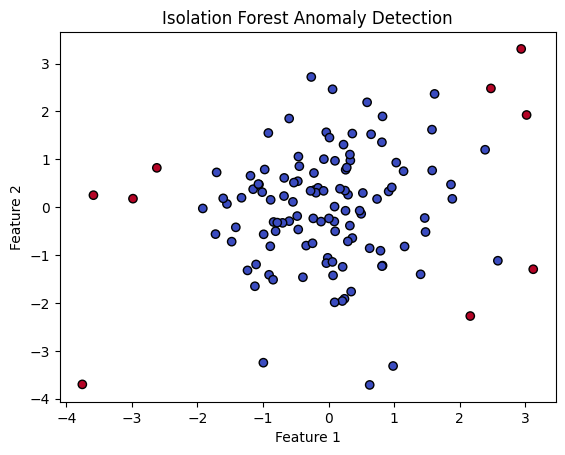

In [ ]:
# Generate a synthetic dataset
np.random.seed(42)
X_normal = np.random.randn(100, 2)  # 100 normal points
X_anomalous = np.random.uniform(low=-4, high=4, size=(20, 2))  # 20 anomalous points

X = np.concatenate([X_normal, X_anomalous], axis=0)

# Initialize and train Isolation Forest
iso_forest = IsolationForest(n_trees=100, sample_size=64)
iso_forest.fit(X)

# Predict anomalies
anomaly_scores = iso_forest.anomaly_score(X)
predictions = iso_forest.predict(X, threshold=0.5)

# Visualize the results
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='coolwarm', edgecolor='k')
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Explanation of the Code

1. **IsolationTree Class**:
   - **fit()**: This method recursively builds the tree by selecting random features and random split values. The tree grows until it either reaches a predefined height or only one data point remains.
   - **path_length()**: Computes the path length for data points as they traverse the tree. The path length is the number of splits required to isolate a point.

2. **IsolationForest Class**:
   - **fit()**: Constructs the isolation forest by training multiple isolation trees on random subsets of the data.
   - **anomaly_score()**: Computes the average path length across all trees and converts this into an anomaly score.
   - **predict()**: Uses the anomaly scores to predict whether data points are anomalies based on a given threshold.

3. **Example Usage**:
   - We generate a synthetic dataset with normal and anomalous points.
   - The Isolation Forest model is trained on this dataset, and anomaly scores are computed.
   - The results are visualized, where different colors indicate normal points versus anomalies.

---

Isolation Forest is a popular algorithm for anomaly detection that works by isolating outliers in the data. While there are libraries like `scikit-learn` that have built-in implementations of Isolation Forest, you might want to implement it in **PyTorch** for customizability, GPU acceleration, or integration with other deep learning models.

Implementing Isolation Forest in PyTorch involves creating a custom tree-based algorithm. Let's go through how you can implement and use Isolation Forest in PyTorch step by step.

### Key Concepts of Isolation Forest

1. **Isolation Trees**: The algorithm creates a forest of random trees (called Isolation Trees). Each tree is built by randomly selecting a feature and then randomly selecting a split value between the minimum and maximum values of that feature.

2. **Isolation**: The logic is that anomalies are easier to isolate because they are less frequent and hence require fewer splits.

3. **Anomaly Score**: The anomaly score is calculated based on the average path length from the root node to the terminating node. The shorter the path, the more anomalous the data point is considered.

Here’s a basic implementation of Isolation Forest using PyTorch. This is a simplified version and does not leverage GPU acceleration, as the algorithm is inherently tree-based and not highly parallelizable like deep learning models. However, implementing it in PyTorch allows for easier integration with other PyTorch-based systems.

### Step 1: Import Libraries

In [ ]:
import torch
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Step 2: Define the Isolation Tree

An Isolation Tree is a binary tree that partitions data by randomly selecting a feature and a split value.

In [ ]:
class IsolationTree:
    def __init__(self, height_limit):
        self.height_limit = height_limit
        self.n_nodes = 0
        self.left = None
        self.right = None
        self.split_feature = None
        self.split_value = None

    def fit(self, X, current_height=0):
        # If only one sample left or height limit reached
        if len(X) <= 1 or current_height >= self.height_limit:
            return None

        # Select a random feature and random split value
        n_features = X.shape[1]
        self.split_feature = torch.randint(0, n_features, (1,)).item()
        feature_values = X[:, self.split_feature]
        min_val, max_val = feature_values.min(), feature_values.max()

        if min_val == max_val:
            return None

        self.split_value = torch.FloatTensor(1).uniform_(min_val, max_val).item()

        # Split the data into two parts
        left_indices = feature_values < self.split_value
        right_indices = feature_values >= self.split_value

        # Increment the node count
        self.n_nodes += 1

        # Create child nodes
        self.left = IsolationTree(self.height_limit)
        self.right = IsolationTree(self.height_limit)

        # Recursively fit the left and right branches
        self.left.fit(X[left_indices], current_height + 1)
        self.right.fit(X[right_indices], current_height + 1)

    def path_length(self, X):
        # Base case
        if self.split_feature is None or self.split_value is None:
            return torch.zeros(X.shape[0])

        # Determine which path to take
        feature_values = X[:, self.split_feature]
        left_indices = feature_values < self.split_value
        right_indices = feature_values >= self.split_value

        # Recursively calculate path length
        path_len = torch.zeros(X.shape[0])

        # Add 1 to the path length for this node
        path_len[left_indices] = 1 + self.left.path_length(X[left_indices])
        path_len[right_indices] = 1 + self.right.path_length(X[right_indices])

        return path_len


### Step 3: Define the Isolation Forest

The Isolation Forest is a collection of Isolation Trees.

In [ ]:
class IsolationForest:
    def __init__(self, n_trees=100, sample_size=256):
        self.n_trees = n_trees
        self.sample_size = sample_size
        self.trees = []
        self.height_limit = int(np.ceil(np.log2(sample_size)))

    def fit(self, X):
        # Build each tree
        for _ in range(self.n_trees):
            # Sample data points randomly
            sample_indices = torch.randint(0, X.shape[0], (self.sample_size,))
            X_sample = X[sample_indices]

            # Create a new tree
            tree = IsolationTree(self.height_limit)

            # Fit the tree with the sample data
            tree.fit(X_sample)
            self.trees.append(tree)

    def anomaly_score(self, X):
        # Calculate path lengths for each sample across all trees
        path_lengths = torch.zeros(X.shape[0])
        for tree in self.trees:
            path_lengths += tree.path_length(X)

        # Average path length
        avg_path_length = path_lengths / self.n_trees

        # Calculate anomaly scores
        c = 2 * (np.log(self.sample_size - 1) + 0.5772156649) - (2 * (self.sample_size - 1) / self.sample_size)
        scores = torch.pow(2, -avg_path_length / c)

        return scores

    def predict(self, X, threshold=0.5):
        scores = self.anomaly_score(X)
        return (scores > threshold).int()


###Step 4: Train and Evaluate the Model

Now that we have the Isolation Forest class, we can generate a dataset, train the model, and evaluate its performance.

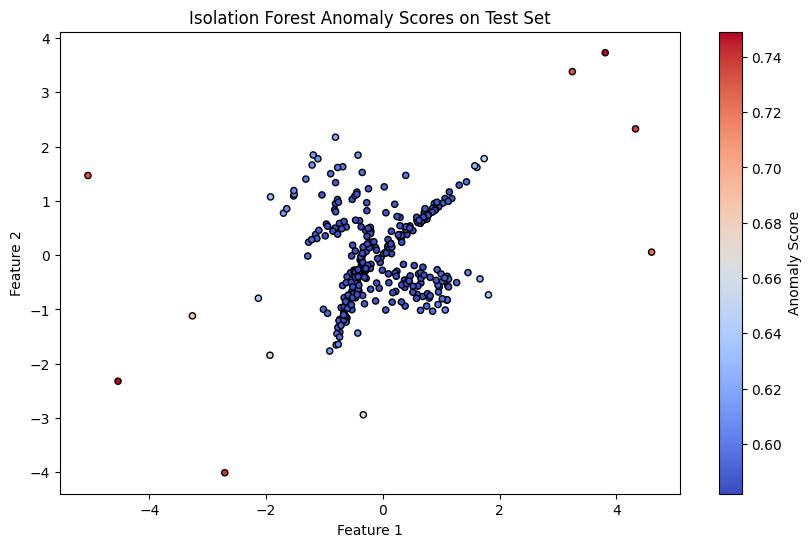

Accuracy: 53.02%


In [ ]:
# Generate a binary classification dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Introduce some anomalies by adding random noise
n_anomalies = 50
anomalies = np.random.rand(n_anomalies, 2) * 20 - 10
X = np.concatenate((X, anomalies), axis=0)
y = np.concatenate([y, np.ones(n_anomalies)])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_torch = torch.FloatTensor(X_train)
X_test_torch = torch.FloatTensor(X_test)

# Train the Isolation Forest
model = IsolationForest(n_trees=100, sample_size=256)
model.fit(X_train_torch)

# Calculate anomaly scores for the test set
scores = model.anomaly_score(X_test_torch).numpy()

# Set a threshold and predict anomalies
threshold = 0.5
predictions = model.predict(X_test_torch, threshold=threshold).numpy()

# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=scores, cmap='coolwarm', s=20, edgecolor='k')
plt.colorbar(label='Anomaly Score')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Isolation Forest Anomaly Scores on Test Set')
plt.show()

# Calculate and print the accuracy of anomaly detection
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


### Explanation



1. **Consistent Data Types**:
   - The feature data \(X\) is converted to PyTorch tensors (`torch.FloatTensor`) both for the training and testing sets to ensure consistency throughout the implementation.

2. **Train-Test Split**:
   - The data is split into training and testing sets using `train_test_split` from `sklearn.model_selection` to evaluate the model's performance on unseen data.

3. **Standardization**:
   - The features are standardized using `StandardScaler` from `sklearn.preprocessing`, and the same transformation is applied to both the training and testing sets.

4. **Training and Evaluation**:
   - The model is trained only on the training data. The anomaly scores and predictions are computed on the test data to evaluate performance properly.

5. **Visualization**:
   - The anomaly scores are visualized to inspect how the model detects anomalies.


### Model Workflow

- **Dataset Generation**: We create a synthetic dataset with normal samples and artificially add anomalies for testing purposes.
- **Data Preprocessing**: Features are standardized to have zero mean and unit variance, which can improve the performance of distance-based models like Isolation Forest.
- **Isolation Forest Model**: We use a custom implementation to build Isolation Trees in PyTorch.
- **Anomaly Detection**: We calculate anomaly scores for the test data and visualize these scores to see how well the model detects anomalies.
- **Evaluation**: We compute accuracy to gauge how well the model distinguishes between normal and anomalous data.

### Using PyOD

In [ ]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.2-py3-none-any.whl size=198469 sha256=d5a73f43232e0cd9c145302d56ffc3ad216b10cc5f557b168cc55c04e79c696b
  Stored in directory: /root/.cache/pip/wheels/77/c2/20/34d1f15b41b701ba69f42a32304825810d680754d509f91391
Successfully built pyod


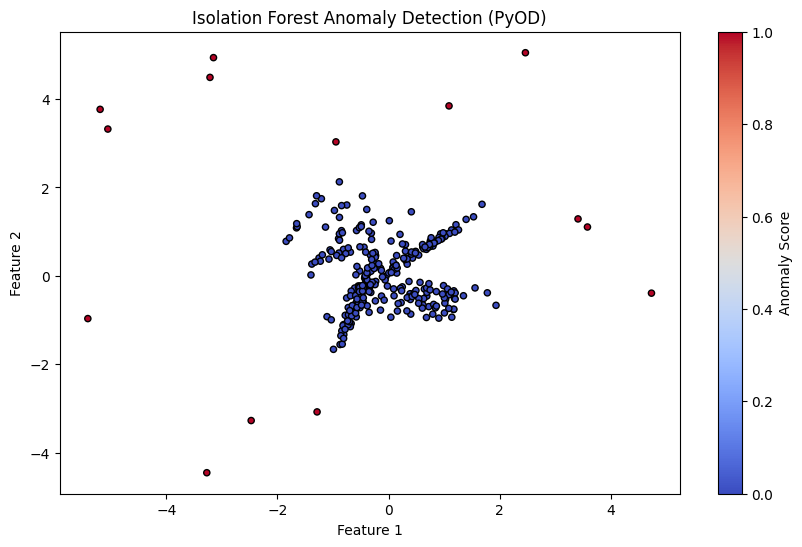

Isolation Forest ROC:0.5419, precision @ rank n:1.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.iforest import IForest
from sklearn.datasets import make_classification
from pyod.utils.data import generate_data, evaluate_print
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate a binary classification dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Introduce some anomalies by adding random noise
n_anomalies = 50
anomalies = np.random.rand(n_anomalies, 2) * 20 - 10
X = np.concatenate((X, anomalies), axis=0)
y = np.concatenate([y, np.ones(n_anomalies)])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Isolation Forest model using PyOD
clf = IForest(contamination=0.05, random_state=42)
clf.fit(X_train)

# Predict the anomalies in the test set
y_pred = clf.predict(X_test)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', s=20, edgecolor='k')
plt.colorbar(label='Anomaly Score')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Isolation Forest Anomaly Detection (PyOD)')
plt.show()

# Evaluate the performance
evaluate_print('Isolation Forest', y_test, y_pred)


##Naive Bayes

**Description**: Naive Bayes is a classification algorithm based on Bayes' Theorem, assuming independence between features.

Types:
- Gaussian Naive Bayes (for continuous data).
- Multinomial Naive Bayes (for discrete data).
- Bernoulli Naive Bayes (for binary data).

Steps for **Gaussian Naive Bayes**:
- Calculate prior probabilities: These are the probabilities of each class based on the training data.
- Calculate likelihood: For Gaussian Naive Bayes, the likelihood is the probability density of each feature given a class, assuming a Gaussian distribution.
- Apply Bayes' Theorem: Combine prior probabilities and likelihood to compute posterior probabilities.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class GaussianNaiveBayes:
    def __init__(self):
        self.classes = None
        self.mean = None
        self.var = None
        self.priors = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        # Initialize mean, variance, and priors
        self.mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self.var = np.zeros((n_classes, n_features), dtype=np.float64)
        self.priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[idx, :] = X_c.mean(axis=0)
            self.var[idx, :] = X_c.var(axis=0)
            self.priors[idx] = X_c.shape[0] / float(n_samples)

    def gaussian_density(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        for idx, c in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            conditional = np.sum(np.log(self.gaussian_density(idx, x)))
            posterior = prior + conditional
            posteriors.append(posterior)

        return self.classes[np.argmax(posteriors)]

In [ ]:
# Visualization function

def plot_dataset(X, y):
    """Visualize the dataset"""
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=100)
    plt.title('Dataset Distribution')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

In [ ]:
# Visualization function

def plot_decision_boundary(model, X, y):
    """Visualize the decision boundary"""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=100, cmap='coolwarm')
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

In [ ]:
# Gaussian visualization

def plot_gaussian_distribution(model, X, y):
    """Visualize the Gaussian distribution fits for each class"""
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    for idx, feature_idx in enumerate([0, 1]):
        feature_values = X[:, feature_idx]
        min_val, max_val = feature_values.min() - 1, feature_values.max() + 1
        x_range = np.linspace(min_val, max_val, 100)

        for class_idx, c in enumerate(model.classes):
            mean = model.mean[class_idx, feature_idx]
            var = model.var[class_idx, feature_idx]
            gaussian = (1 / (np.sqrt(2 * np.pi * var))) * np.exp(- (x_range - mean) ** 2 / (2 * var))
            ax[idx].plot(x_range, gaussian, label=f'Class {c}', lw=2)

        ax[idx].set_title(f'Gaussian Fit for Feature {feature_idx + 1}')
        ax[idx].set_xlabel(f'Feature {feature_idx + 1}')
        ax[idx].set_ylabel('Density')
        ax[idx].legend()

    plt.tight_layout()
    plt.show()

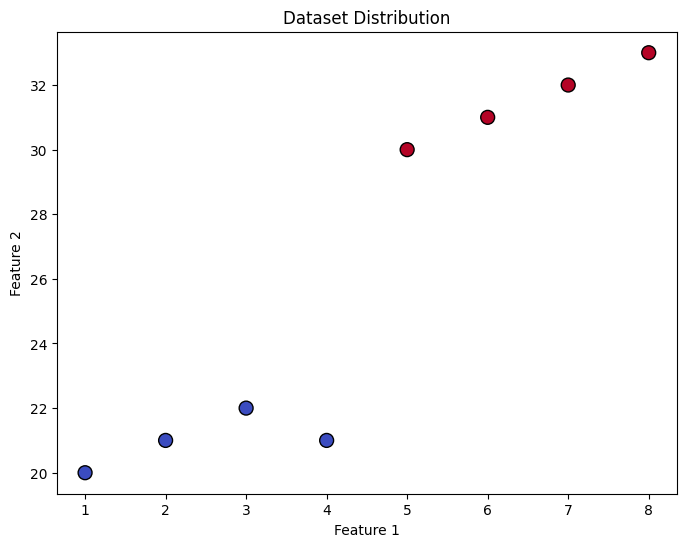

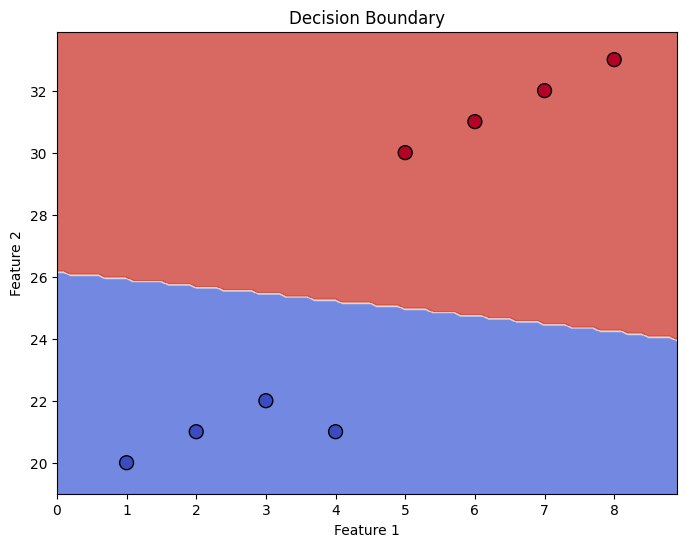

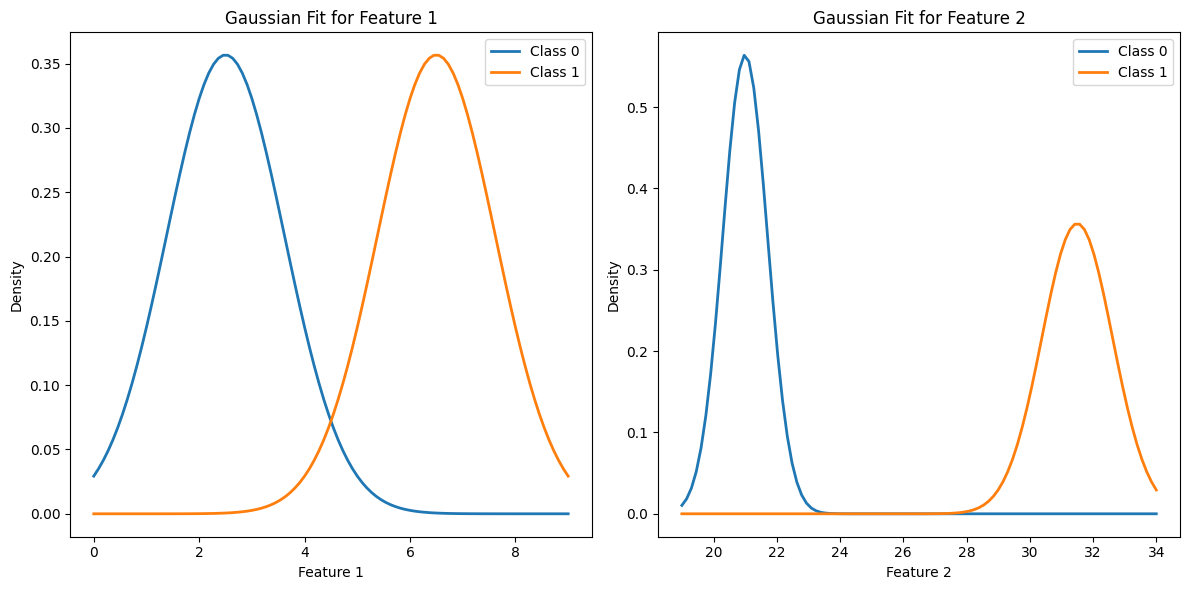

Predictions: [0 1]


In [ ]:
# Create a simple dataset (X: features, y: labels)
X = np.array([[1, 20], [2, 21], [3, 22], [4, 21], [5, 30], [6, 31], [7, 32], [8, 33]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

# Initialize the model and train it
model = GaussianNaiveBayes()
model.fit(X, y)

# Plot dataset distribution
plot_dataset(X, y)

# Predict on new data
X_test = np.array([[2, 22], [6, 30]])
predictions = model.predict(X_test)

# Plot decision boundary
plot_decision_boundary(model, X, y)

# Plot Gaussian distribution fit for each class
plot_gaussian_distribution(model, X, y)

print("Predictions:", predictions)

Explanation:

- fit method:
    
    - This method calculates the mean, variance, and prior probabilities for each class.
    - For each class, it calculates the mean and variance of the features assuming they follow a Gaussian (normal) distribution.

- gaussian_density method:
    - This method calculates the probability of a feature value given a class, based on the Gaussian probability density function.

- predict method:
    - For each test point, the model calculates the posterior probability for each class using the Gaussian likelihood and priors, and assigns the class with the highest posterior probability.

Visualizations:

- Dataset Distribution: This shows how the dataset is distributed in the feature space, with different colors for different classes.

- Decision Boundary: After training the model, we visualize the decision boundary. This boundary shows the regions where the classifier predicts different classes.

- Gaussian Distribution Fit: For each feature, this visualization shows the Gaussian distribution that the Naive Bayes model fits for each class.

---

**Multinomial Naive Bayes**:

- This variant is typically used for discrete data, especially in text classification problems where the features represent counts (e.g., word counts in documents).
- It assumes that the features are multinomially distributed, and is particularly effective for bag-of-words models in Natural Language Processing (NLP).

Multinomial Naive Bayes Implementation:

In Multinomial Naive Bayes, we calculate the probability of observing a feature (e.g., word count) given a class using a multinomial distribution.

In [ ]:
import numpy as np

class MultinomialNaiveBayes:
    def __init__(self):
        self.classes = None
        self.class_priors = None
        self.feature_probs = None

    def fit(self, X, y):
        """
        Fit the model to the training data.
        X: Document-term matrix (n_samples, n_features)
        y: Class labels (n_samples)
        """
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        # Initialize arrays to store class priors and feature probabilities
        self.class_priors = np.zeros(n_classes)
        self.feature_probs = np.zeros((n_classes, n_features))

        # Calculate class priors and feature probabilities
        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.class_priors[idx] = X_c.shape[0] / n_samples
            self.feature_probs[idx, :] = (X_c.sum(axis=0) + 1) / (X_c.sum() + n_features)  # Laplace smoothing

    def predict(self, X):
        """
        Predict class labels for test data.
        X: Test data (n_samples, n_features)
        """
        log_class_priors = np.log(self.class_priors)
        log_feature_probs = np.log(self.feature_probs)

        log_probs = X @ log_feature_probs.T + log_class_priors
        return self.classes[np.argmax(log_probs, axis=1)]

In [ ]:
# Document-term matrix (toy dataset)
X = np.array([[2, 1, 0, 1],
              [1, 0, 1, 1],
              [2, 1, 1, 0],
              [0, 1, 0, 2]])

y = np.array([0, 0, 1, 1])  # Class labels

# Train and predict using Multinomial Naive Bayes
model = MultinomialNaiveBayes()
model.fit(X, y)

# Test data (document-term matrix)
X_test = np.array([[1, 0, 0, 1], [0, 2, 0, 1]])
predictions = model.predict(X_test)

print("Predictions:", predictions)

Predictions: [0 1]


Key Points:

- Laplace Smoothing: To avoid zero probabilities when features (e.g., words) don't appear in a class, we apply Laplace smoothing by adding 1 to the word counts and adjusting the denominator.
- Application: Multinomial Naive Bayes is widely used in text classification tasks like spam detection or sentiment analysis.

---

**Bernoulli Naive Bayes Implementation**

In Bernoulli Naive Bayes, each feature is assumed to be a binary variable (0 or 1), representing the presence or absence of a feature (e.g., word) in a document.

In [ ]:
import numpy as np

class BernoulliNaiveBayes:
    def __init__(self):
        self.classes = None
        self.class_priors = None
        self.feature_probs = None

    def fit(self, X, y):
        """
        Fit the model to the training data.
        X: Binary feature matrix (n_samples, n_features)
        y: Class labels (n_samples)
        """
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        # Initialize arrays to store class priors and feature probabilities
        self.class_priors = np.zeros(n_classes)
        self.feature_probs = np.zeros((n_classes, n_features))

        # Calculate class priors and feature probabilities
        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.class_priors[idx] = X_c.shape[0] / n_samples
            self.feature_probs[idx, :] = (X_c.sum(axis=0) + 1) / (X_c.shape[0] + 2)  # Laplace smoothing

    def predict(self, X):
        """
        Predict class labels for test data.
        X: Test data (n_samples, n_features)
        """
        log_class_priors = np.log(self.class_priors)
        log_feature_probs = np.log(self.feature_probs)
        log_feature_complement_probs = np.log(1 - self.feature_probs)

        log_probs = X @ log_feature_probs.T + (1 - X) @ log_feature_complement_probs.T + log_class_priors
        return self.classes[np.argmax(log_probs, axis=1)]

In [ ]:
# Binary feature matrix (toy dataset)
X = np.array([[1, 1, 0, 1],
              [0, 0, 1, 1],
              [1, 1, 1, 0],
              [0, 1, 0, 1]])

y = np.array([0, 0, 1, 1])  # Class labels

# Train and predict using Bernoulli Naive Bayes
model = BernoulliNaiveBayes()
model.fit(X, y)

# Test data (binary feature matrix)
X_test = np.array([[1, 0, 0, 1], [0, 1, 0, 1]])
predictions = model.predict(X_test)

print("Predictions:", predictions)

Predictions: [0 0]


Key Points:

- Binary Features: In Bernoulli Naive Bayes, each feature is treated as a binary value (e.g., 0 or 1), indicating the presence or absence of the feature.
- Laplace Smoothing: Similar to the multinomial version, we apply Laplace smoothing to avoid zero probabilities.
- Application: Bernoulli Naive Bayes is particularly useful when working with binary features, like when representing documents with a binary term-document matrix.

Visualizing the differences between the types of Naive Bayes models can make it clear why certain models are better suited to specific data types. I’ll show you the differences between Gaussian Naive Bayes and Multinomial Naive Bayes through visualizations, and explain why one might fail when used in place of the other.

Here’s how we’ll approach this:

- Gaussian Naive Bayes assumes continuous features that follow a normal (Gaussian) distribution. It works well with real-valued data.

- Multinomial Naive Bayes assumes discrete features (often counts or frequencies), and works well with text data or categorical data.

**Example 1**: Visualizing Gaussian Naive Bayes on Discrete Data

Using Gaussian Naive Bayes on data that is discrete (e.g., counts or binary values) can lead to poor results because the assumption of continuous data is violated. I will simulate this by creating some count-based data and applying Gaussian Naive Bayes to it.


**Example 2**: Visualizing Multinomial Naive Bayes on Continuous Data

Similarly, using Multinomial Naive Bayes on continuous data (e.g., real-valued features like height, weight, etc.) doesn’t work well, because the model assumes that features are counts or frequencies, which leads to misinterpretation of the data.


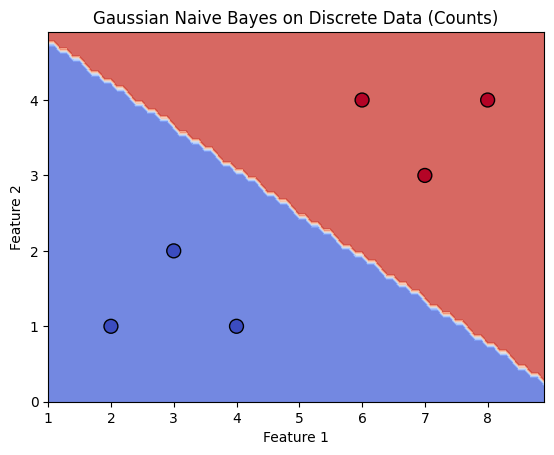

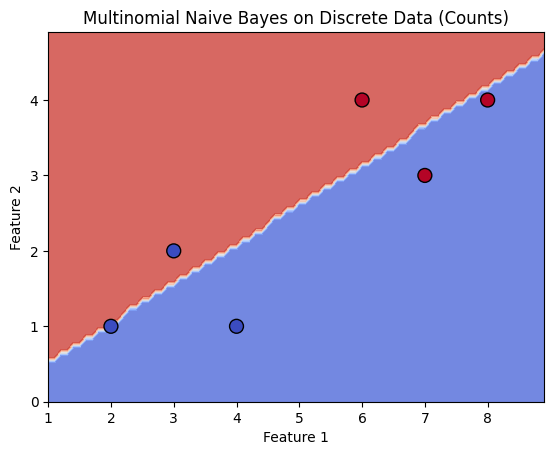

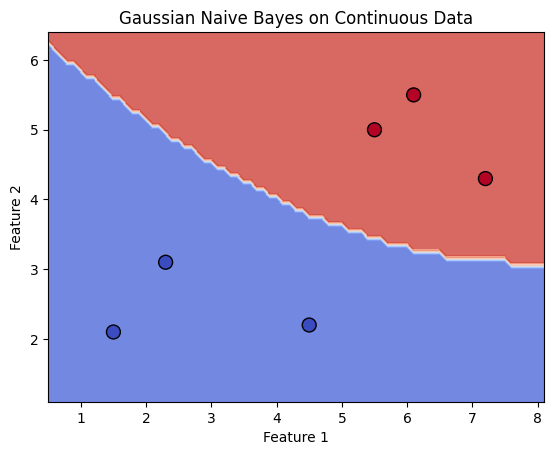

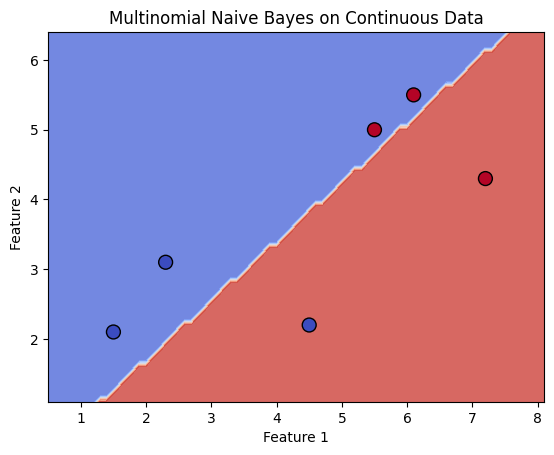

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# Visualization functions
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=100, cmap='coolwarm')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Example 1: Gaussian Naive Bayes on Discrete Data (Counts)
X_discrete = np.array([[2, 1], [3, 2], [4, 1], [6, 4], [7, 3], [8, 4]])
y_discrete = np.array([0, 0, 0, 1, 1, 1])  # Labels

# Apply Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_discrete, y_discrete)

# Apply Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_discrete, y_discrete)

# Visualize Gaussian NB on Discrete Data
plot_decision_boundary(gnb, X_discrete, y_discrete, "Gaussian Naive Bayes on Discrete Data (Counts)")

# Visualize Multinomial NB on Discrete Data
plot_decision_boundary(mnb, X_discrete, y_discrete, "Multinomial Naive Bayes on Discrete Data (Counts)")

# Example 2: Multinomial Naive Bayes on Continuous Data
X_continuous = np.array([[1.5, 2.1], [2.3, 3.1], [4.5, 2.2], [5.5, 5.0], [6.1, 5.5], [7.2, 4.3]])
y_continuous = np.array([0, 0, 0, 1, 1, 1])  # Labels

# Apply Gaussian Naive Bayes
gnb.fit(X_continuous, y_continuous)

# Apply Multinomial Naive Bayes
mnb.fit(X_continuous, y_continuous)

# Visualize Gaussian NB on Continuous Data
plot_decision_boundary(gnb, X_continuous, y_continuous, "Gaussian Naive Bayes on Continuous Data")

# Visualize Multinomial NB on Continuous Data
plot_decision_boundary(mnb, X_continuous, y_continuous, "Multinomial Naive Bayes on Continuous Data")

Visual Explanation:
1. Gaussian Naive Bayes on Discrete Data (Counts):

    Issue: Gaussian Naive Bayes assumes that the features follow a continuous distribution (e.g., a normal distribution). When the input data is discrete (like word counts in text classification), this assumption is violated. You will see that Gaussian Naive Bayes can generate erratic decision boundaries, which are not ideal for discrete data.

2. Multinomial Naive Bayes on Discrete Data (Counts):

    Expected Behavior: Multinomial Naive Bayes is well-suited for count-based data (e.g., term frequencies in text data). The decision boundary will be cleaner and better suited to this kind of data, as it operates on the assumption that the features are drawn from a multinomial distribution.

3. Gaussian Naive Bayes on Continuous Data:

    Expected Behavior: Gaussian Naive Bayes works well for continuous data since it assumes that features follow a normal distribution. You will see a smooth decision boundary that fits the continuous data effectively.

4. Multinomial Naive Bayes on Continuous Data:

    Issue: Multinomial Naive Bayes assumes that the features are discrete (like counts or frequencies), and using it on continuous data will lead to poor results. The decision boundary will likely be erratic or nonsensical, as the model is not designed for this type of input.

Why You Cannot Use One in Place of the Other:

- Gaussian Naive Bayes is designed for continuous data. When used on discrete data, it cannot model the data well because it expects features to follow a Gaussian (normal) distribution, which is not the case with discrete data.
- Multinomial Naive Bayes is designed for discrete data (like word counts in text classification). When used on continuous data, it assumes the data are counts, which can lead to incorrect results, as continuous data doesn’t fit the multinomial distribution assumption.

---

#### **Why we cannot use multinomial instead of Bernoulli since it is also discrete and can be used for binary?**

It is true that both **Multinomial Naive Bayes** and **Bernoulli Naive Bayes** are designed for **discrete data**. However, the two models differ in how they handle **binary features** and **interpret the input data**, which is why one cannot be directly substituted for the other in certain cases.

Let me explain the core differences and why **Multinomial Naive Bayes** is not ideal for binary data where **Bernoulli Naive Bayes** excels.

### Key Differences Between Multinomial Naive Bayes and Bernoulli Naive Bayes:

1. **Feature Representation**:
   - **Multinomial Naive Bayes** is designed to work with **count-based data**, where features represent the number of occurrences of events (e.g., word frequencies in documents). It considers the **frequency** of features.
   - **Bernoulli Naive Bayes** is designed to work with **binary data**, where features represent the presence or absence of events (e.g., whether a word occurs in a document or not). It considers only **whether a feature is present (1) or absent (0)**.

2. **Handling of Feature Absence**:
   - **Multinomial Naive Bayes** doesn't focus on the absence of features (i.e., whether a feature is 0 or not). It models the probability of seeing certain counts of features.
   - **Bernoulli Naive Bayes**, on the other hand, explicitly considers both the presence **and absence** of features. It computes probabilities for both the occurrence and non-occurrence of features.

### Why You Cannot Use Multinomial Naive Bayes in Place of Bernoulli:

1. **Binary Data Misinterpretation**:
   - **Multinomial Naive Bayes** assumes that features represent counts, so it models the probability of feature counts occurring in a given class. If you provide binary features (i.e., 0 or 1), the Multinomial model will treat them as if they are counts, which isn't always appropriate.
   - **Bernoulli Naive Bayes**, on the other hand, models binary features more naturally by computing the probability of both presence and absence, which is important when features can be either 0 or 1.

2. **Impact of Feature Absence**:
   - In **Multinomial Naive Bayes**, feature absence (i.e., features being 0) is less important because the model focuses on feature counts. This means it ignores the cases where features are 0 and doesn't penalize predictions much for absent features.
   - In **Bernoulli Naive Bayes**, feature absence (features being 0) is explicitly modeled, and this can greatly affect classification. For example, the absence of a certain word in a document could be as informative as its presence.
   
### Visualizing the Difference:

To further clarify, let's visualize how **Multinomial Naive Bayes** and **Bernoulli Naive Bayes** handle binary features. In this example, we'll create a binary dataset and apply both models to see the difference in performance.

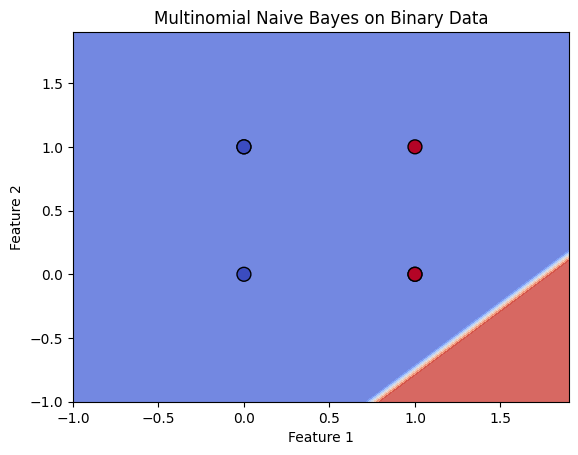

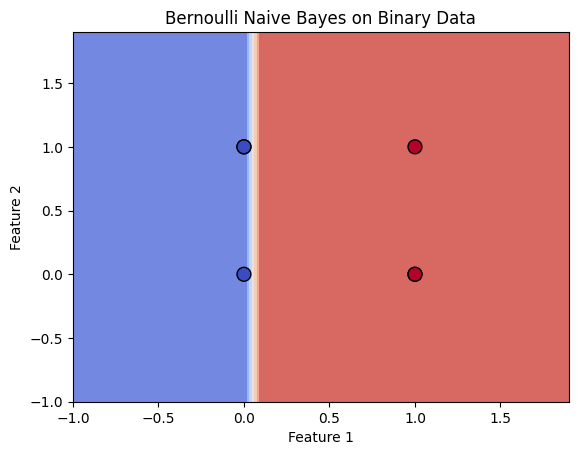

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# Visualization function
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=100, cmap='coolwarm')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Example binary data
X_binary = np.array([[0, 1], [1, 0], [1, 1], [0, 0], [0, 1], [1, 0]])
y_binary = np.array([0, 0, 1, 0, 0, 1])  # Labels

# Apply Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_binary, y_binary)

# Apply Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_binary, y_binary)

# Visualize Multinomial NB on Binary Data
plot_decision_boundary(mnb, X_binary, y_binary, "Multinomial Naive Bayes on Binary Data")

# Visualize Bernoulli NB on Binary Data
plot_decision_boundary(bnb, X_binary, y_binary, "Bernoulli Naive Bayes on Binary Data")

### Visual Explanation:

1. **Multinomial Naive Bayes on Binary Data**:
   - **Issue**: The model will treat binary values as if they are counts, which may lead to suboptimal decision boundaries. For instance, it might overemphasize features that are `1` and underemphasize features that are `0` because it doesn't naturally model feature absence.
   
2. **Bernoulli Naive Bayes on Binary Data**:
   - **Expected Behavior**: The model explicitly considers both the presence and absence of features, leading to a more appropriate decision boundary when dealing with binary data. It treats both `1` and `0` as informative features.

### When to Use Each Model:

1. **Use Multinomial Naive Bayes**:
   - When the features represent **counts** or **frequencies**.
   - Typical application: Text classification with **bag-of-words** or **TF-IDF** features, where the number of occurrences of words is important.

2. **Use Bernoulli Naive Bayes**:
   - When the features are **binary** (0 or 1), representing the presence or absence of a feature.
   - Typical application: Text classification with binary features (e.g., "word present or not in a document"), or any other classification task where features are binary.

### Summary:
- **Multinomial Naive Bayes** is designed for **count data** and doesn't model the absence of features well. It assumes the data represents the number of occurrences of events and is thus not ideal for binary data.
- **Bernoulli Naive Bayes** is specifically designed for **binary data** and models both the presence and absence of features. This makes it better suited for tasks where features can be either 0 or 1.
- Using **Multinomial Naive Bayes** for binary data can lead to suboptimal results because it interprets binary values as counts, which isn't always meaningful in certain contexts.

##Perceptron Algorithm

The Perceptron is a binary classification algorithm. It updates its weights based on the misclassified examples during training and aims to find a hyperplane that separates the two classes.

Steps:

- Initialize the weights and bias to zeros.
- For each training example, predict the class based on the current weights and update the weights if the prediction is incorrect.
- Repeat the process until all examples are classified correctly or a maximum number of iterations is reached.

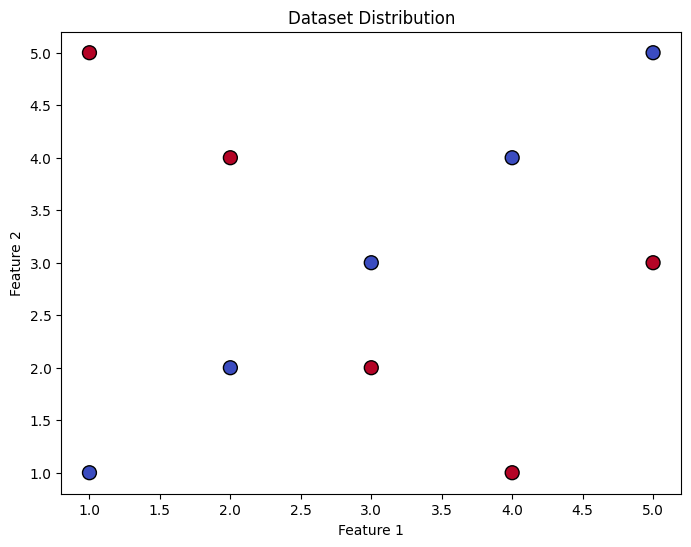

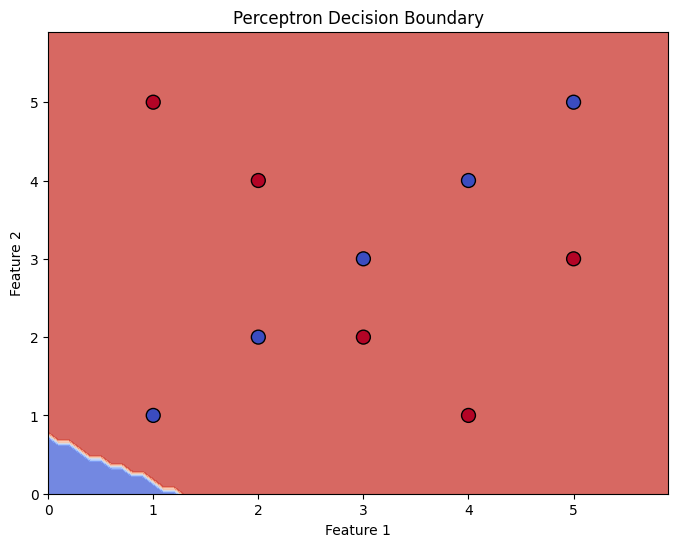

Predictions: [1 1 1 1]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class Perceptron:
    # def __init__(self, learning_rate=0.01, n_iters=1000):
    #     self.learning_rate = learning_rate
    #     self.n_iters = n_iters
    #     self.weights = None
    #     self.bias = None

    # def fit(self, X, y):
    #     n_samples, n_features = X.shape
    #     self.weights = np.zeros(n_features)
    #     self.bias = 0

    #     # Convert y to {-1, 1} since Perceptron uses these labels
    #     y_ = np.where(y == 0, -1, 1)

    #     for _ in range(self.n_iters):
    #         for idx, x_i in enumerate(X):
    #             linear_output = np.dot(x_i, self.weights) + self.bias
    #             y_predicted = np.sign(linear_output)

    #             # Update weights and bias if the sample is misclassified
    #             if y_predicted != y_[idx]:
    #                 self.weights += self.learning_rate * y_[idx] * x_i
    #                 self.bias += self.learning_rate * y_[idx]

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.weights_history = []
        self.bias_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Convert y to {-1, 1} since Perceptron uses these labels
        y_ = np.where(y == 0, -1, 1)

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(linear_output)

                # Update weights and bias if the sample is misclassified
                if y_predicted != y_[idx]:
                    self.weights += self.learning_rate * y_[idx] * x_i
                    self.bias += self.learning_rate * y_[idx]

                # Store the weight and bias history for visualization
                self.weights_history.append(np.copy(self.weights))
                self.bias_history.append(self.bias)
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = np.sign(linear_output)
        return np.where(y_predicted == -1, 0, 1)

# Visualization functions

def plot_dataset(X, y):
    """Visualize the dataset"""
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=100)
    plt.title('Dataset Distribution')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

def plot_decision_boundary(model, X, y):
    """Visualize the decision boundary"""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=100, cmap='coolwarm')
    plt.title('Perceptron Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

def plot_training_progress(weights_history, bias_history, X, y):
    """Visualize the training progress by showing how weights and bias change"""
    plt.figure(figsize=(8, 6))
    plt.plot(weights_history, label='Weights')
    plt.plot(bias_history, label='Bias')
    plt.title('Training Progress (Weights and Bias Updates)')
    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Create a simple linearly separable dataset (X: features, y: labels)
X = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [1, 5], [2, 4], [3, 2], [4, 1], [5, 3]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Initialize the Perceptron model and train it
model = Perceptron(learning_rate=0.1, n_iters=10)
model.fit(X, y)

# Visualize dataset distribution
plot_dataset(X, y)

# Visualize decision boundary
plot_decision_boundary(model, X, y)

# Predictions
X_test = np.array([[2, 3], [3, 4], [1, 4], [5, 1]])
predictions = model.predict(X_test)
print("Predictions:", predictions)

In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.weights_history = []
        self.bias_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Convert y to {-1, 1} since Perceptron uses these labels
        y_ = np.where(y == 0, -1, 1)

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(linear_output)

                # Update weights and bias if the sample is misclassified
                if y_predicted != y_[idx]:
                    self.weights += self.learning_rate * y_[idx] * x_i
                    self.bias += self.learning_rate * y_[idx]

                # Store the weight and bias history for visualization
                self.weights_history.append(np.copy(self.weights))
                self.bias_history.append(self.bias)


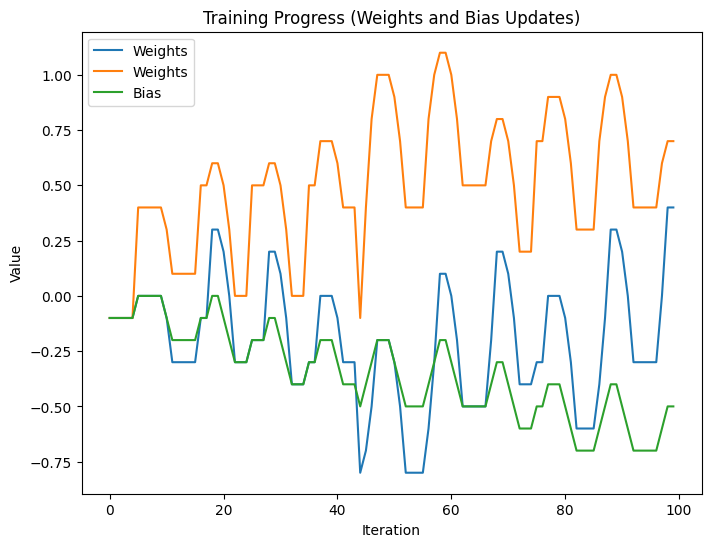

In [ ]:
# Visualize training progress
plot_training_progress(model.weights_history, model.bias_history, X, y)


Explanation:

- Dataset Distribution: This visualization shows the dataset and highlights the two classes using different colors.

- Decision Boundary: After the Perceptron model is trained, the decision boundary is plotted. The Perceptron algorithm will attempt to find a linear boundary between the two classes, which can be visualized using contour plots.

- Training Progress: This is added to track the changes to weights and bias over the training iterations. You can store the weight and bias values at each step and plot them as they converge.

##Adaline Algorithm

Adaline is similar to the Perceptron but uses a continuous activation function rather than a binary step function. Adaline minimizes the Mean Squared Error (MSE) for training rather than making updates based on misclassified examples like the Perceptron.
Key Differences:

- Continuous output: Adaline computes the weighted sum and passes it directly to the cost function.
- Learning via Gradient Descent: The model uses gradient descent to minimize the Mean Squared Error (MSE).

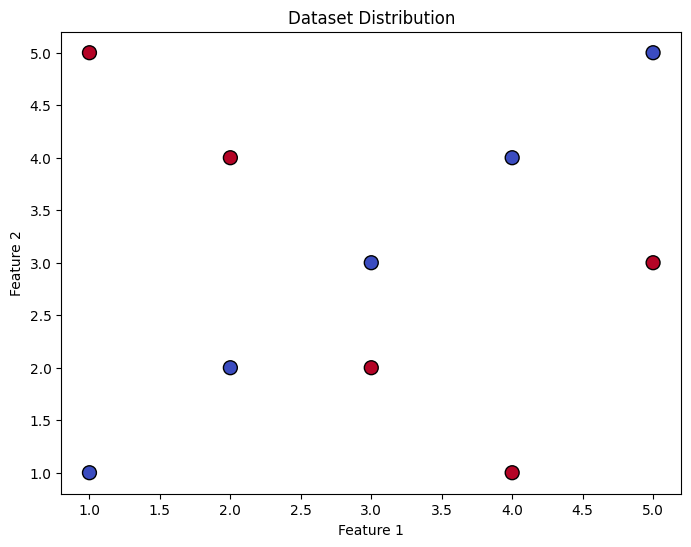

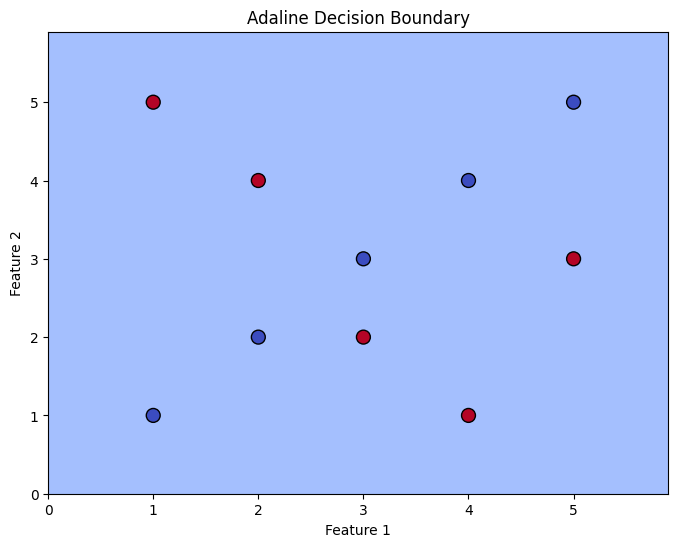

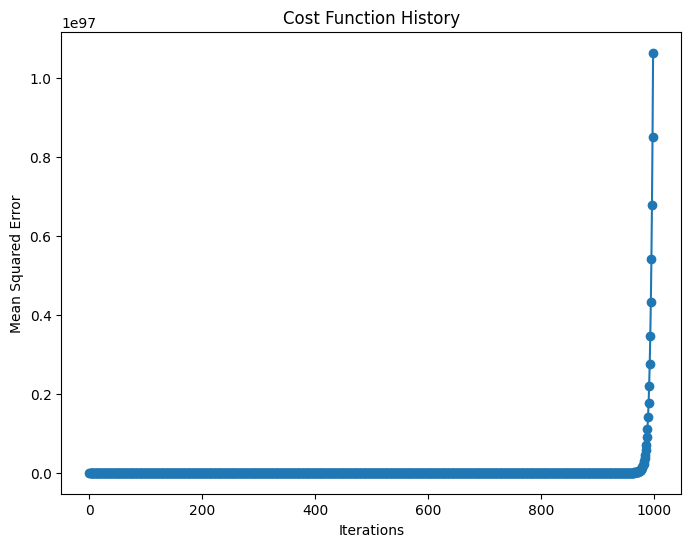

Predictions: [0 0 0 0]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Adaline:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.cost_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_output = np.dot(X, self.weights) + self.bias
            errors = y - linear_output
            self.weights += self.learning_rate * np.dot(X.T, errors)
            self.bias += self.learning_rate * errors.sum()

            # Compute Mean Squared Error (MSE) cost
            cost = (errors**2).mean()
            self.cost_history.append(cost)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0.0, 1, 0)

# Visualization Functions

def plot_dataset(X, y):
    """Visualize the dataset"""
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=100)
    plt.title('Dataset Distribution')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

def plot_decision_boundary(model, X, y):
    """Visualize the decision boundary"""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=100, cmap='coolwarm')
    plt.title('Adaline Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

def plot_cost_history(cost_history):
    """Visualize the cost history (Mean Squared Error over iterations)"""
    plt.figure(figsize=(8, 6))
    plt.plot(cost_history, marker='o')
    plt.title('Cost Function History')
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.show()

# Create a simple linearly separable dataset (X: features, y: labels)
X = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [1, 5], [2, 4], [3, 2], [4, 1], [5, 3]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Initialize the Adaline model and train it
model = Adaline(learning_rate=0.01, n_iters=1000)
model.fit(X, y)

# Visualize dataset distribution
plot_dataset(X, y)

# Visualize decision boundary
plot_decision_boundary(model, X, y)

# Visualize cost history
plot_cost_history(model.cost_history)

# Predictions
X_test = np.array([[2, 3], [3, 4], [1, 4], [5, 1]])
predictions = model.predict(X_test)
print("Predictions:", predictions)

Visualization Details:

- Dataset Distribution: This scatter plot shows the dataset and highlights the two classes with different colors.

- Decision Boundary: After training the Adaline model, the decision boundary between the two classes is visualized as a contour plot. The Adaline model will try to find a linear boundary between the classes.

- Cost Function History: The cost function (MSE) is plotted over the iterations, showing how the error decreases as the model learns. This is crucial for understanding the convergence behavior of Adaline.

##Hierarchical Clustering

The example uses Agglomerative Clustering, which is a bottom-up approach where each data point starts as its own cluster, and pairs of clusters are merged at each step based on a linkage criterion.

Hierarchical Clustering Algorithm (Agglomerative)

- Start with each data point as its own cluster.
- Compute the distance between all clusters.
- Merge the two closest clusters.
- Repeat steps 2 and 3 until only one cluster remains (or until a desired number of clusters is reached).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

class HierarchicalClustering:
    def __init__(self, n_clusters=2, linkage_method="single"):
        self.n_clusters = n_clusters
        self.linkage_method = linkage_method
        self.labels_ = None

    def fit(self, X):
        # Compute the pairwise distance matrix
        self.linkage_matrix = linkage(X, method=self.linkage_method)
        self.labels_ = self._form_clusters(self.linkage_matrix, self.n_clusters)

    def _form_clusters(self, linkage_matrix, n_clusters):
        """Form clusters based on the linkage matrix and the desired number of clusters"""
        # Initialize each point to be its own cluster
        n_samples = linkage_matrix.shape[0] + 1
        clusters = {i: [i] for i in range(n_samples)}

        # Merge clusters step by step according to the linkage matrix
        for i in range(n_samples - n_clusters):
            cluster_1, cluster_2 = int(linkage_matrix[i][0]), int(linkage_matrix[i][1])
            clusters[n_samples + i] = clusters[cluster_1] + clusters[cluster_2]
            del clusters[cluster_1]
            del clusters[cluster_2]

        # Assign final cluster labels
        labels = np.zeros(n_samples, dtype=int)
        for cluster_idx, cluster_points in enumerate(clusters.values()):
            for point in cluster_points:
                labels[point] = cluster_idx

        return labels

# Visualization functions

def plot_dendrogram(model, X):
    """Visualize the hierarchical clustering with a dendrogram"""
    plt.figure(figsize=(10, 6))
    dendrogram(model.linkage_matrix)
    plt.title("Dendrogram for Hierarchical Clustering")
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.show()

def plot_clusters(X, labels):
    """Visualize the resulting clusters"""
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm', edgecolor='k', s=100)
    plt.title('Clusters Formed by Hierarchical Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

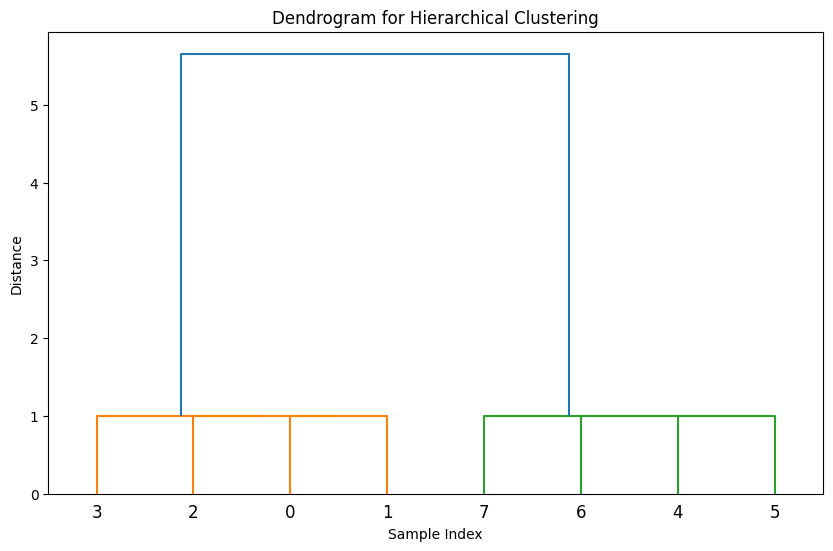

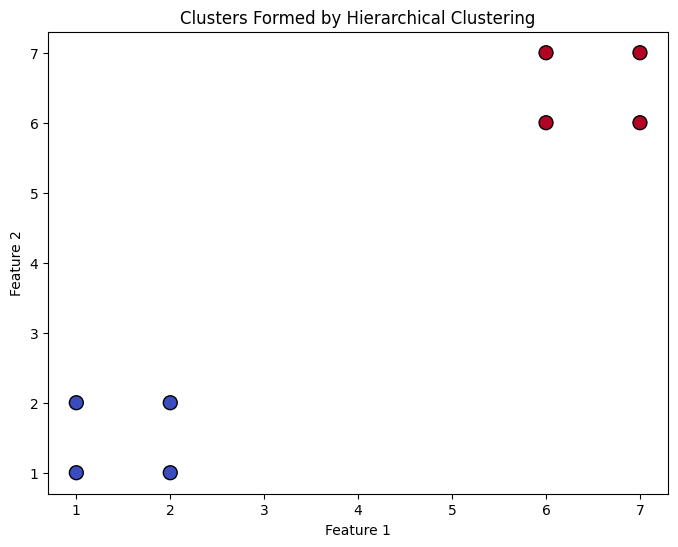

Cluster Labels: [0 0 0 0 1 1 1 1]


In [ ]:
# Create a simple dataset
X = np.array([[1, 1], [1, 2], [2, 1], [2, 2], [6, 6], [6, 7], [7, 6], [7, 7]])

# Initialize the Hierarchical Clustering model
model = HierarchicalClustering(n_clusters=2, linkage_method='single')

# Fit the model
model.fit(X)

# Visualize the Dendrogram
plot_dendrogram(model, X)

# Visualize the final clusters
plot_clusters(X, model.labels_)

# Show cluster labels
print("Cluster Labels:", model.labels_)

Visualization Details:

- Dendrogram: This tree-like diagram shows the hierarchy of clusters formed during the agglomerative clustering process. The vertical axis represents the distance between merged clusters, and the horizontal axis represents the data points.

- Cluster Plot: Once the clusters are formed, this scatter plot visualizes the data points colored by their respective clusters.

Key Concepts:

- Linkage Method: Determines how the distance between clusters is calculated. Some common methods include:
    - Single Linkage: Minimum distance between clusters.
    - Complete Linkage: Maximum distance between clusters.
    - Average Linkage: Average distance between clusters.
- Dendrogram: A graphical representation that shows how clusters are formed and merged step by step.

##Hidden Markov Model (HMM)

Hidden Markov Models (HMMs) are widely used for sequence modeling tasks where we need to model an observable sequence that is driven by a hidden sequence of states. They are particularly useful for applications like **speech recognition**, **part-of-speech tagging**, and **time-series analysis**.

### Why Use HMM?

- **Sequence Modeling**: HMMs are ideal when you have a sequence of observations and want to infer the underlying sequence of states. For instance, in speech recognition, we hear sounds (observations) but want to infer the words or phonemes (states).
- **Hidden States**: HMMs allow us to model hidden states that are not directly observable but influence the observed data. This is essential in scenarios where you observe effects (e.g., symptoms) but not the causes (e.g., diseases).
- **Probabilistic Model**: HMMs provide a probabilistic framework, which means they can handle uncertainty in observations and states, making them robust to noisy data.

### Key Components of HMM

1. **States**: Hidden states that we want to infer.
2. **Observations**: Observable events generated by these hidden states.
3. **Transition Probabilities**: The probability of moving from one state to another.
4. **Emission Probabilities**: The probability of observing an event given a particular state.
5. **Initial Probabilities**: The starting probabilities for each state.

We’ll implement a simple HMM with states, transition probabilities, and emission probabilities, and use the Viterbi algorithm to infer the most probable sequence of states.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class HiddenMarkovModel:
    def __init__(self, states, observations, start_prob, trans_prob, emit_prob):
        """
        Initialize the HMM model.
        :param states: List of states
        :param observations: List of possible observations
        :param start_prob: Initial probability distribution for states
        :param trans_prob: State transition probability matrix
        :param emit_prob: Emission probability matrix
        """
        self.states = states
        self.observations = observations
        self.start_prob = start_prob
        self.trans_prob = trans_prob
        self.emit_prob = emit_prob

    def viterbi(self, obs_sequence):
        """
        Perform Viterbi algorithm to find the most likely sequence of hidden states for a given observation sequence.
        :param obs_sequence: List of observations
        :return: Most likely sequence of states
        """
        n_states = len(self.states)
        n_observations = len(obs_sequence)

        # Initialize the Viterbi table and path
        viterbi_table = np.zeros((n_states, n_observations))
        backpointer = np.zeros((n_states, n_observations), dtype=int)

        # Initialize the first column based on initial probabilities and emission probabilities
        for s in range(n_states):
            viterbi_table[s, 0] = self.start_prob[s] * self.emit_prob[s, obs_sequence[0]]
            backpointer[s, 0] = 0

        # Fill in the Viterbi table
        for t in range(1, n_observations):
            for s in range(n_states):
                trans_probs = viterbi_table[:, t-1] * self.trans_prob[:, s]
                max_prob_state = np.argmax(trans_probs)
                viterbi_table[s, t] = trans_probs[max_prob_state] * self.emit_prob[s, obs_sequence[t]]
                backpointer[s, t] = max_prob_state

        # Traceback the most probable path
        best_path = [np.argmax(viterbi_table[:, -1])]
        for t in range(n_observations - 1, 0, -1):
            best_path.insert(0, backpointer[best_path[0], t])

        best_state_sequence = [self.states[idx] for idx in best_path]
        return best_state_sequence


In [2]:
# Define HMM components
states = ['Rainy', 'Sunny']
observations = ['Walk', 'Shop', 'Clean']
start_prob = np.array([0.6, 0.4])  # Initial probability of states
trans_prob = np.array([[0.7, 0.3],  # Transition probabilities between states
                       [0.4, 0.6]])
emit_prob = np.array([[0.1, 0.4, 0.5],  # Emission probabilities for each observation given a state
                      [0.6, 0.3, 0.1]])

# Observation sequence (e.g., activities observed over a series of days)
obs_sequence = [0, 1, 2, 1, 0]  # Encodes "Walk", "Shop", "Clean", "Shop", "Walk"

# Instantiate and run the HMM
hmm = HiddenMarkovModel(states, observations, start_prob, trans_prob, emit_prob)
predicted_states = hmm.viterbi(obs_sequence)

# Display the predicted state sequence
print("Predicted states:", predicted_states)

Predicted states: ['Sunny', 'Rainy', 'Rainy', 'Rainy', 'Sunny']
